In [736]:
%pip install -r requirements.txt

  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl (8.0 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Odmowa dostępu: 'c:\\Users\\PC\\Desktop\\studia\\Metody Systemowe i Decyzyjne\\Projekt\\MSiDProject\\.venv\\Lib\\site-packages\\matplotlib\\ft2font.cp312-win_amd64.pyd'
Check the permissions.



# Imports

In [737]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import seaborn as sns
from itertools import product
import random
from typing import List, Tuple

from reader import parse_csvs, SimulationResults

# Clean CSV Data Files

In [738]:
from io import TextIOWrapper
import os

for file in [file for file in os.listdir("data") if file.startswith("Attempt")]:
    file_path: str = f"data/{file}"
    f: TextIOWrapper = open(file_path, "r")
    lines: list[str] = f.readlines()
    if lines[0].strip().endswith(";"):
        print(f"Fixing file {file_path}")
        lines[0] = lines[0].strip()[:-1] + "\n"
    f.close()

    f = open(file_path, "w")
    f.writelines(lines)
    f.close()


Fixing file data/Attempt 0 - 09.05.2024 09-41-59.csv
Fixing file data/Attempt 1 - 09.05.2024 09-47-19.csv
Fixing file data/Attempt 10 - 09.05.2024 10-25-12.csv
Fixing file data/Attempt 100 - 09.05.2024 04-49-16.csv
Fixing file data/Attempt 101 - 09.05.2024 04-53-57.csv
Fixing file data/Attempt 102 - 09.05.2024 04-58-39.csv
Fixing file data/Attempt 103 - 09.05.2024 05-03-20.csv
Fixing file data/Attempt 104 - 09.05.2024 05-08-01.csv
Fixing file data/Attempt 105 - 09.05.2024 05-12-43.csv
Fixing file data/Attempt 106 - 09.05.2024 05-17-24.csv
Fixing file data/Attempt 107 - 09.05.2024 05-22-05.csv
Fixing file data/Attempt 108 - 09.05.2024 05-26-47.csv
Fixing file data/Attempt 109 - 09.05.2024 05-31-28.csv
Fixing file data/Attempt 11 - 09.05.2024 10-29-53.csv
Fixing file data/Attempt 110 - 09.05.2024 05-36-07.csv
Fixing file data/Attempt 111 - 09.05.2024 05-40-48.csv
Fixing file data/Attempt 112 - 09.05.2024 05-45-30.csv
Fixing file data/Attempt 113 - 09.05.2024 05-50-11.csv
Fixing file data

# Get Data

In [739]:
simulation_results: List[SimulationResults] = parse_csvs()

Started parsing...
Excluding extinct result 109 - 09.05.2024 05-31-28
Excluding extinct result 116 - 09.05.2024 06-04-15
Excluding extinct result 123 - 09.05.2024 06-34-18
Excluding extinct result 134 - 09.05.2024 07-23-55
Excluding extinct result 135 - 09.05.2024 07-26-55
Excluding extinct result 137 - 09.05.2024 07-34-52
Excluding extinct result 142 - 09.05.2024 07-53-57
Excluding extinct result 145 - 09.05.2024 08-05-58
Excluding extinct result 154 - 09.05.2024 08-44-20
Excluding extinct result 155 - 09.05.2024 08-44-46
Excluding extinct result 162 - 09.05.2024 09-14-56
Excluding extinct result 164 - 09.05.2024 09-20-27
Excluding extinct result 168 - 09.05.2024 09-37-14
Excluding extinct result 180 - 09.05.2024 10-29-14
Excluding extinct result 181 - 09.05.2024 10-30-57
Error parsing file Initial settings 182 - 09.05.2024 10-33-28.csv: [Errno 2] No such file or directory: 'c:\\Users\\PC\\Desktop\\studia\\Metody Systemowe i Decyzyjne\\Projekt\\MSiDProject\\data\\Attempt 182 - 09.05.2

# Creating DataFrames

In [740]:
initial_parameters = DataFrame([result.parameters.iloc[0] for result in simulation_results])
results = DataFrame([result.get_last_history() for result in simulation_results])

# Introductory analysis

In [741]:
def correlation_matrix(df: pd.DataFrame) -> None:
    """
    Generate a correlation matrix heatmap for a given DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame for which the correlation matrix is to be generated.

    Returns:
    - None
    """
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.show()
    
def correlation_column(df: pd.DataFrame, column: str) -> None:
    """
    Generates a heatmap showing the correlation between the specified column and all other columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The name of the column to calculate the correlation with.

    Returns:
    None
    """
    plt.figure(figsize=(12,8))
    corr: DataFrame = df.corr()[[column]].drop(column)
    sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
    plt.show()

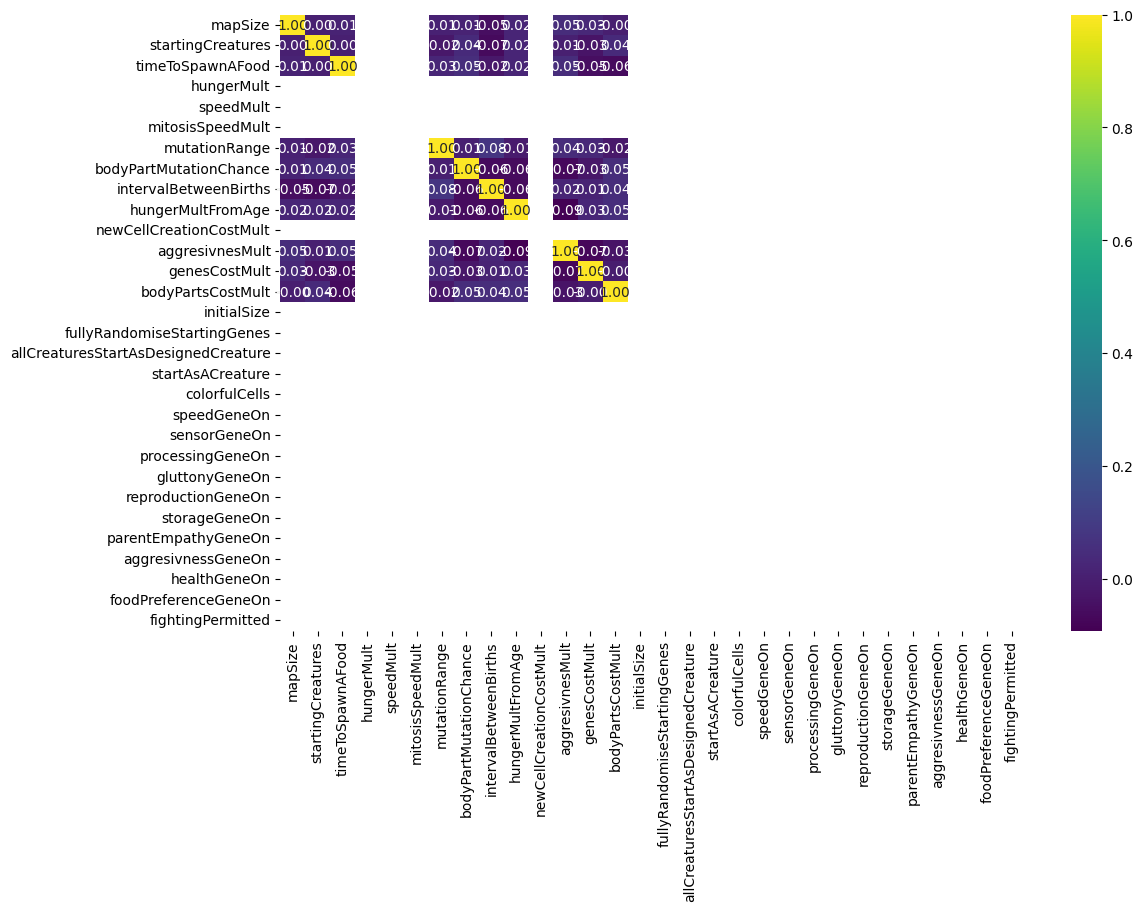

In [742]:
correlation_matrix(initial_parameters)

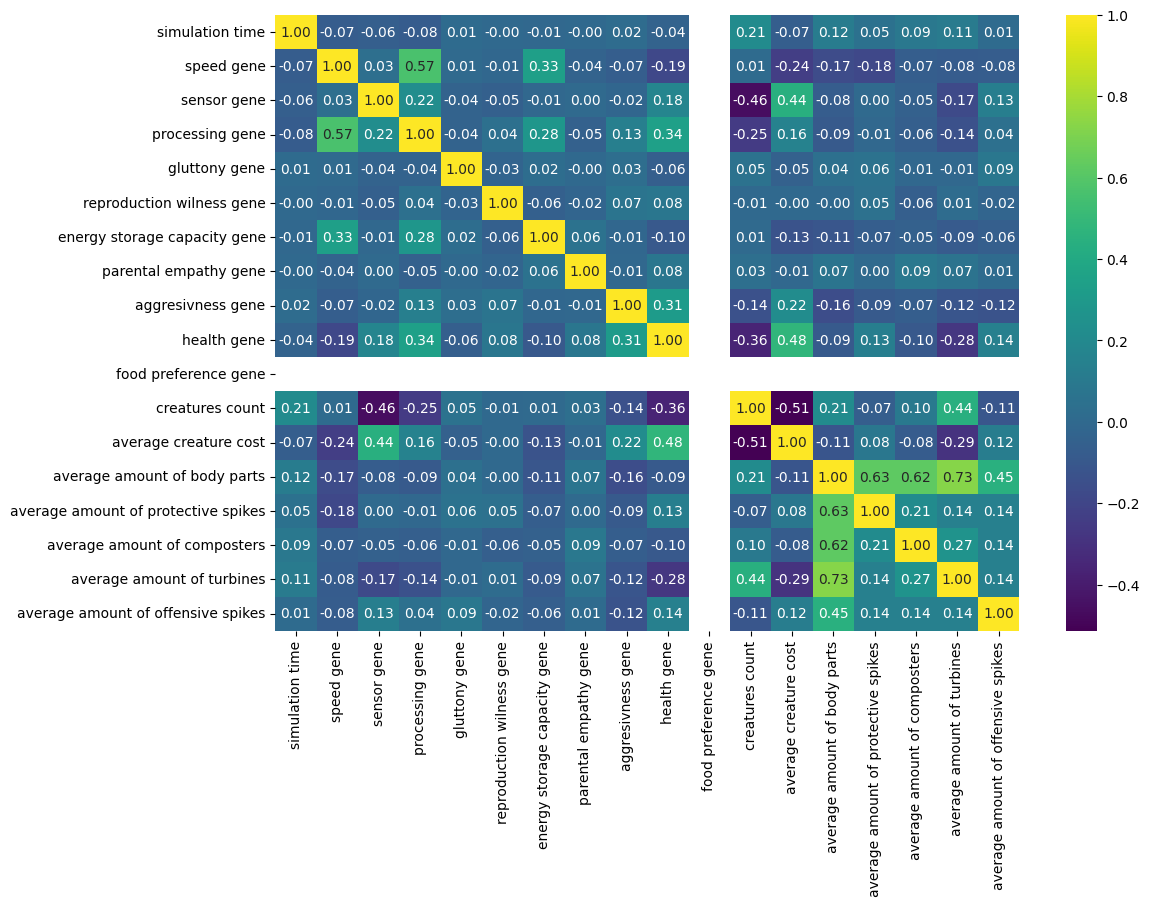

In [743]:
correlation_matrix(results)

It is clear from the data, that many columns can be dropped from initial parameters, and at least one from results.

# Cleaning Data

In [744]:
initial_parameters: DataFrame = initial_parameters.drop(
    columns=[
        "hungerMult",
        "speedMult",
        "mitosisSpeedMult",
        "newCellCreationCostMult", 
        "initialSize", 
        "fullyRandomiseStartingGenes", 
        "allCreaturesStartAsDesignedCreature", 
        "startAsACreature",
        "colorfulCells", 
        "speedGeneOn", 
        "sensorGeneOn", 
        "processingGeneOn", 
        "gluttonyGeneOn",
        "reproductionGeneOn", 
        "storageGeneOn", 
        "parentEmpathyGeneOn", 
        "aggresivnessGeneOn", 
        "healthGeneOn", 
        "foodPreferenceGeneOn", 
        "fightingPermitted"
        ]
    ).dropna()

results: DataFrame = results.drop(
    columns=[        
        "simulation time", 
        "food preference gene"
        ]
    )

results = results.loc[:, ~results.columns.str.contains('^Unnamed')];

Simulation time was also dropped, because only simulations, that stopped ~ 4500 simulation seconds (the maximum time), are analysed

In [745]:
print(results.iloc[0])

speed gene                              0.991227
sensor gene                             0.416732
processing gene                         0.814775
gluttony gene                           0.573346
reproduction wilness gene               0.307748
energy storage capacity gene            0.733310
parental empathy gene                   0.345123
aggresivness gene                       0.866806
health gene                             0.861556
creatures count                        18.000000
average creature cost                   1.545005
average amount of body parts            0.000000
average amount of protective spikes     0.000000
average amount of composters            0.000000
average amount of turbines              0.000000
average amount of offensive spikes      0.000000
Name: 9, dtype: float64


In [746]:
print(initial_parameters.iloc[0])

mapSize                   23.761980
startingCreatures         15.000000
timeToSpawnAFood           4.529128
mutationRange              0.383709
bodyPartMutationChance     0.005873
intervalBetweenBirths     64.644820
hungerMultFromAge          0.003437
aggresivnesMult            1.202730
genesCostMult              0.254597
bodyPartsCostMult          0.791882
Name: 0, dtype: float64


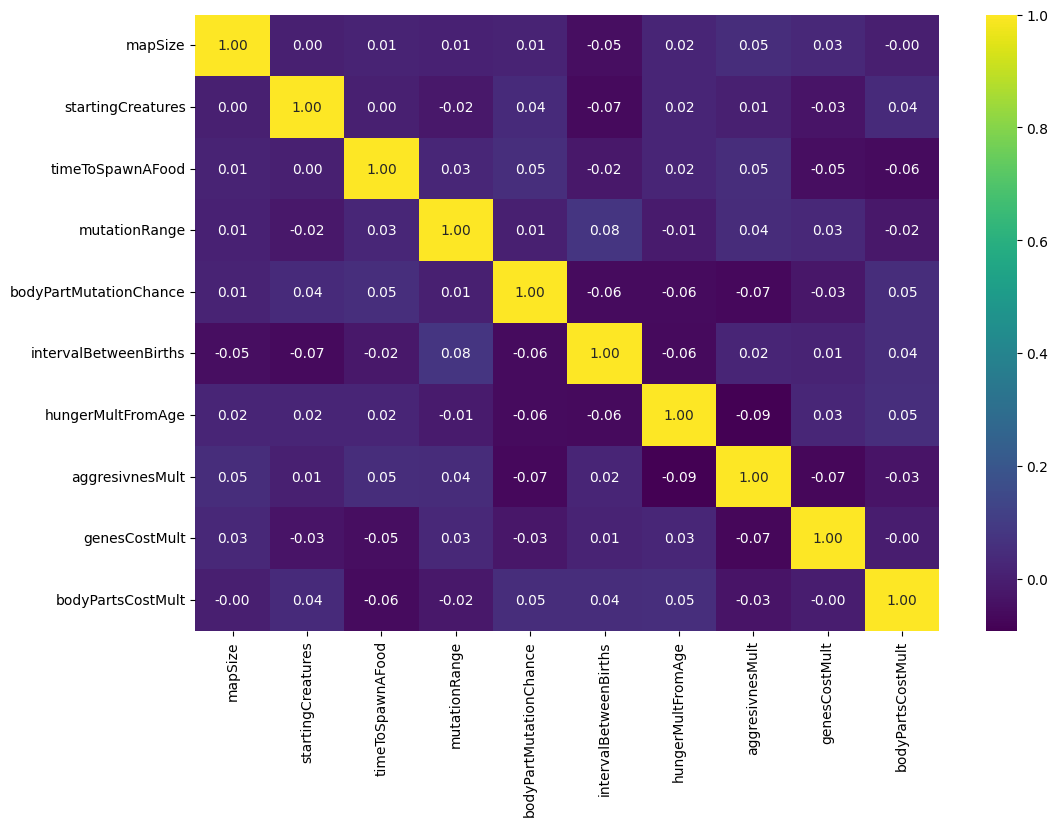

In [747]:
correlation_matrix(initial_parameters)

Correlation of one initial parameter to another is close to zero, as expected. <br>
The initial parameters were generated upon creating the simulation with the help of this custom random power function:

```csharp

float GenerateRandomValue(float min, float max, float mean)
{
    float meanWeight = meanWeightMultiplier * Random.value;

    float x = (Random.value + .5f * meanWeight) / (1 + meanWeight);

    float value = CustomPowerFunction(x, min, max, mean);

    return value;
}

float CustomPowerFunction(float x, float min, float max, float mean)
{
    float meanInterpolated = (mean - min) / (max - min);

    return Mathf.Pow(x, Mathf.Log(meanInterpolated, 0.5f)) * (max - min) + min;
}

Initial parameters, that were set in InitialSettingsInjector.cs in the game:

```csharp

PlayerPrefs.SetFloat("mapSize", GenerateRandomValue(20, 100, 40));

PlayerPrefs.SetFloat("startingCreatures", GenerateRandomValue(1, 60, 25));

PlayerPrefs.SetFloat("timeToSpawnAFood", 1f / GenerateRandomValue(0.1f, 15, 4));

PlayerPrefs.SetFloat("mutationRange", GenerateRandomValue(0.01f, 1f, 0.1f));

PlayerPrefs.SetFloat("bodyPartMutationChance", GenerateRandomValue(0.005f, 1f, 0.05f));

PlayerPrefs.SetFloat("intervalBetweenBirths", GenerateRandomValue(0, 100, 40));

PlayerPrefs.SetFloat("hungerMultFromAge", GenerateRandomValue(0, 3f / 300f, 1f / 300f));

PlayerPrefs.SetFloat("newCellCreationCostMult", 1);

PlayerPrefs.SetFloat("aggresivnesMult", GenerateRandomValue(0, 5, 1));

PlayerPrefs.SetFloat("genesCostMult", GenerateRandomValue(0, 5, 1));

PlayerPrefs.SetFloat("bodyPartsCostMult", GenerateRandomValue(0, 5, 1));

46.61607215314221


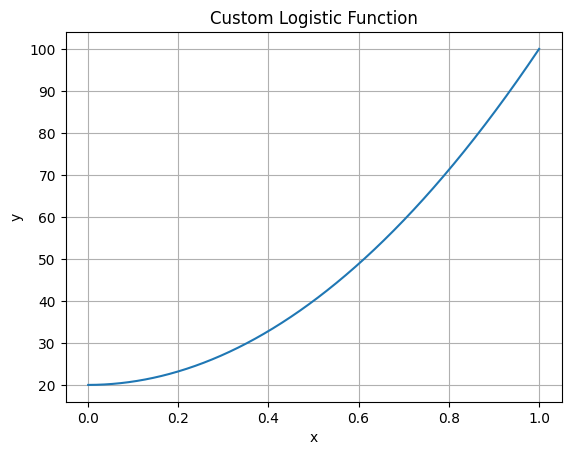

In [748]:
import numpy as np
import math
import matplotlib.pyplot as plt

def custom_logistic(x, minimum, maximum, mean):    
    m_inter = (mean-minimum)/(maximum-minimum)
       
    return x**math.log(m_inter, 0.5) * (maximum-minimum) + minimum

minimum = 20
maximum = 100
mean = 40

mnx: float = (mean - minimum) / (maximum - minimum)

x_values = np.linspace(0.001, 1, 1000)
y_values = custom_logistic(x_values, minimum, maximum, mean)

print(sum(custom_logistic(random.uniform(0., 1.), minimum, maximum, mean) for _ in range(100000)) / 100000)

plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Custom Logistic Function')
plt.grid(True)
plt.show()

The goal was to create a function, that 50% of y values generated are small then the picked "mean", and another 50% above it. <br>
The average != mean, and for this example, it's closer to 46.6. Still, this is a decent way to generate random initial parameters non-linearly.

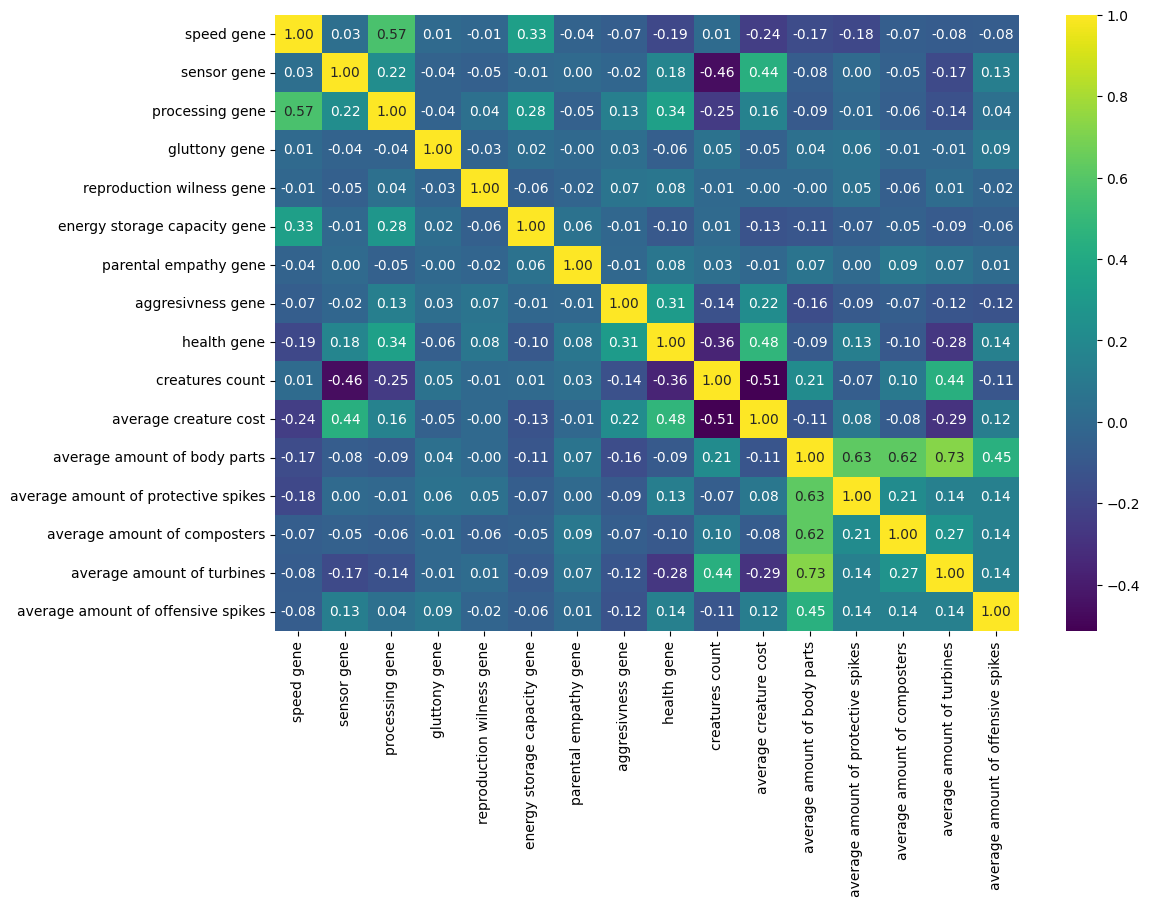

In [749]:
correlation_matrix(results)

Many interesting correlations can be observed with just this correlation matrix. <br><br>
Some of them are obvious - average amount of body parts is based on the average amounts of other body parts. <br><br>
There are strong negative correlations between creatures count and average creature cost. Also between creatures count and health gene. With more creatures, it's less advantegous to have a better developed sensor gene. <br><br>
A pretty interesting strong correlation is between creature count and average amount of turbines. It seems like with more creatures, it's important to get to food before others. Than again, the same correlation is not observed between creature count and speed gene. There could be many explanations, including an unintentional bug in game - data was collected with simulation speed of 16, which is quite large. Because of that, creatures with high speed can "miss" food, because they have less frames to adjust their movement. Turbines greatly increase turning speed, while the speed gene doesn't.

# Estimating results from initial parameters

In [750]:
def estimate(model, initial_parameters, results):
    regressed = model.fit(initial_parameters, results)
    return regressed
        
for column in results.columns:
    analyzed_column = results[column]
        
    x_train, x_test, y_train, y_test = train_test_split(initial_parameters, analyzed_column, test_size=0.2)
        
    reg: LinearRegression = estimate(LinearRegression(), x_train, y_train)
    
    print(f"{column} : {reg.score(initial_parameters, analyzed_column)}")

speed gene : 0.3005385918785882
sensor gene : 0.26566796096036704
processing gene : 0.5692730265940826
gluttony gene : 0.016184169711235485
reproduction wilness gene : -0.0004930715598812085
energy storage capacity gene : 0.17722793757052235
parental empathy gene : 0.05459716585482033
aggresivness gene : 0.07233646408978833
health gene : 0.4486251016260181
creatures count : 0.6865612042142968
average creature cost : 0.4274430276372495
average amount of body parts : 0.4930684542721624
average amount of protective spikes : 0.22802991743602763
average amount of composters : 0.2157591283389807
average amount of turbines : 0.36268847832833906
average amount of offensive spikes : 0.15101311812913198


Some of the scores are high enough to suggest high correlation. The highest is for creatures count. Many are too low to estimate succesfully with this model.

# Estimating Average Creature Cost from Initial Parameters

This report will focus on trying to estimate average creature cost, first from just the initial parameters, and later from the other results too. 

In [751]:
ANALYZED = "average creature cost"

analyzed_column = results[ANALYZED]
print(analyzed_column)

9     1.545005
9     8.851233
9     2.562723
9     1.353786
9    44.179050
       ...    
9     0.839489
9     1.214765
9    22.911050
9     0.278829
9     1.489179
Name: average creature cost, Length: 546, dtype: float64


In [752]:

df_1: DataFrame = initial_parameters.copy()

df_1[ANALYZED] = list(analyzed_column)

print(df_1.head())

    mapSize  startingCreatures  timeToSpawnAFood  mutationRange  \
0  23.76198               15.0          4.529128       0.383709   
0  24.69442               18.0          2.010151       0.286781   
0  44.97563               15.0          6.406969       0.767422   
0  38.97704               41.0          3.277926       0.022458   
0  25.28580               28.0          3.036764       0.092825   

   bodyPartMutationChance  intervalBetweenBirths  hungerMultFromAge  \
0                0.005873               64.64482           0.003437   
0                0.013992               10.22332           0.005131   
0                0.191583               41.19628           0.004297   
0                0.012400               68.63533           0.005164   
0                0.025843               38.36862           0.001853   

   aggresivnesMult  genesCostMult  bodyPartsCostMult  average creature cost  
0         1.202730       0.254597           0.791882               1.545005  
0         1.10

# Removing Outliers

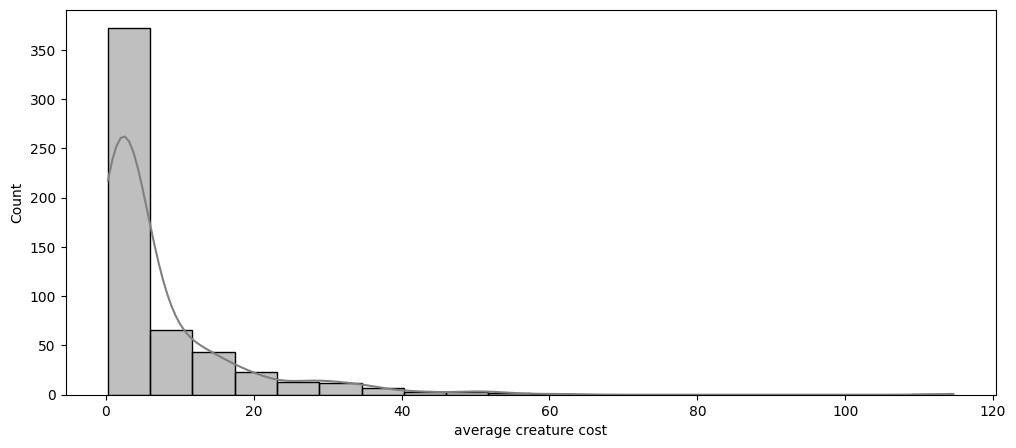

In [753]:
plt.figure(figsize=(12,5))
sns.histplot(df_1[ANALYZED],bins=20,kde=True,color='gray')
plt.show()

In [754]:
import pandas as pd
import numpy as np

def detect_outliers(df, column_name):
    """
    Detect outliers in a specific column using the 3-sigma rule.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column for outlier detection.
    
    Returns:
    pd.Series: Boolean series indicating the presence of outliers.
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    threshold = 3 * std
    
    outliers = (df[column_name] < (mean - threshold)) | (df[column_name] > (mean + threshold))
    return outliers


def remove_outliers(df, column_name):
    """
    Remove outliers from a DataFrame based on the 3-sigma rule.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column for outlier detection.
    
    Returns:
    pd.DataFrame: DataFrame with outliers removed.
    """
    outliers = detect_outliers(df, column_name)
    df_clean = df[~outliers]
    return df_clean

outliers = detect_outliers(df_1, ANALYZED)

print(df_1[outliers][ANALYZED])


0     44.17905
0     50.34346
0     43.40391
0     52.15609
0     49.48494
0     41.43938
0    114.63180
0     61.11230
0     49.23130
0     39.64867
0     54.12691
Name: average creature cost, dtype: float64


The outliers will be removed.

In [755]:
df_1 = remove_outliers(df_1, ANALYZED)

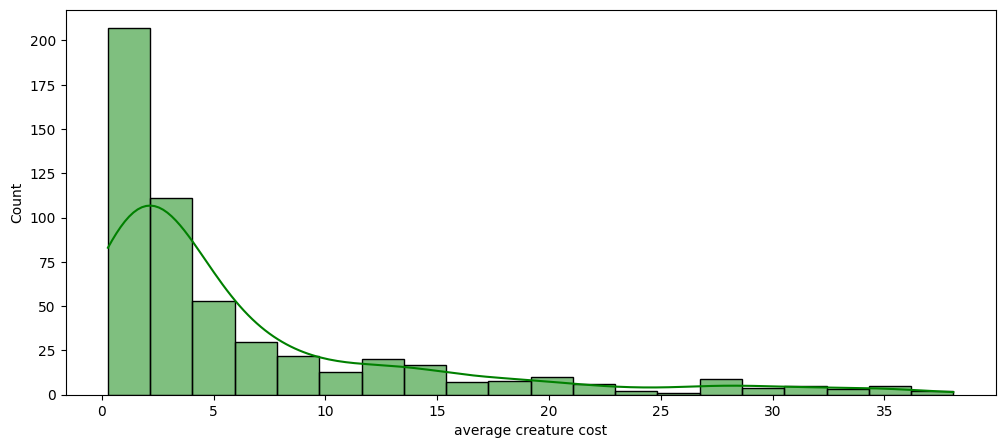

In [756]:
plt.figure(figsize=(12,5))
sns.histplot(df_1[ANALYZED],bins=20,kde=True,color='green')
plt.show()

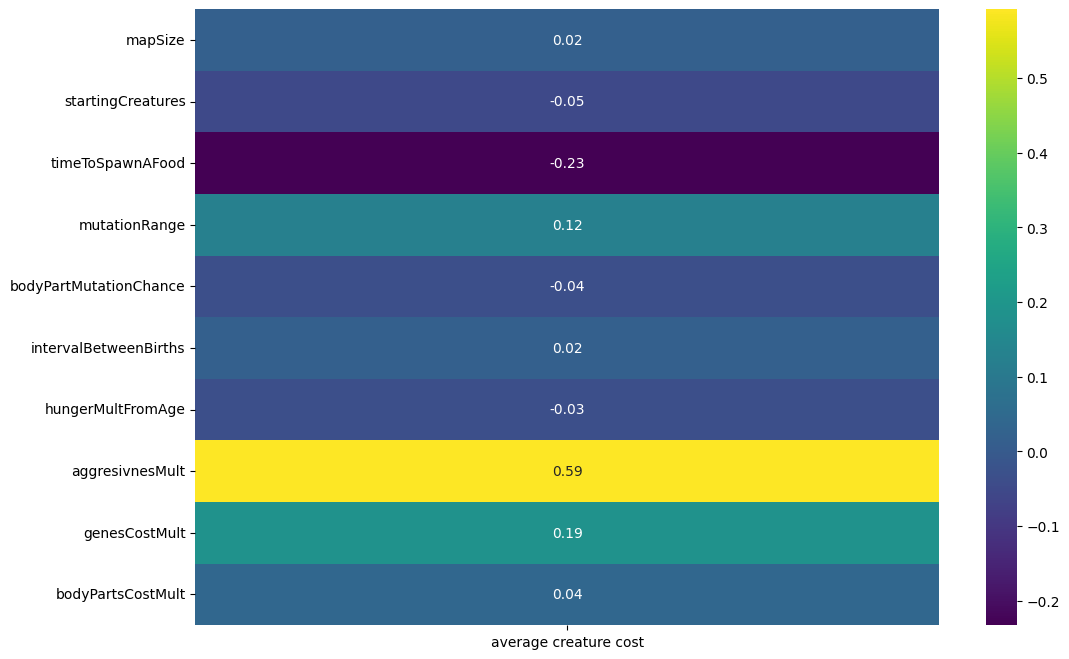

In [757]:
correlation_column(df_1, ANALYZED)

Only three parameters will be kept: aggresivnesMult, timeToSpawnAFood and genesCostMult.

In [758]:
#df_1 = df_1.loc[
#    :,
#    df_1.columns.intersection(
#        [
#            "aggresivnesMult",
#            "timeToSpawnAFood",
#            "genesCostMult",
#            "average creature cost",
#        ]
#    ),
#]


In [759]:
#df_1 = df_1[df_1[ANALYZED] <= 50]
#print(df_1.head())

# Linear Regression

In [760]:
def regress(x, y) -> LinearRegression:    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    reg: LinearRegression = estimate(
        LinearRegression(), x_train, y_train
    )
    print(f"Regression coefficients: {reg.coef_}")
    print(
        f"Regression score on test data: {reg.score(x_test, y_test)}"
    )
    print(f"Regression score on train data: {reg.score(x_train, y_train)}")
    print(f"Regression score on full data: {reg.score(x, y)}")
    
    return reg


In [761]:
x = df_1.drop(columns=[ANALYZED])
y = df_1[ANALYZED]

regress(x, y);

Regression coefficients: [-2.42768766e-03 -3.77963757e-02 -8.10692420e-01  6.77706186e+00
  1.40258758e+00 -4.27174925e-03  6.26334489e+01  6.86914732e+00
  2.09164765e+00  3.49004204e-01]
Regression score on test data: 0.45588384471572263
Regression score on train data: 0.4910271817749201
Regression score on full data: 0.4859932308259822


# Scatter Plots

In [762]:
def visualise_scatter(x, y, data, show_reg=True, xlim=None, ylim=None) -> None:
    plt.figure(figsize=(12,5))
    sns.scatterplot(data=data,x=x,y=y,hue=y,palette='RdYlGn')
    if show_reg:
        sns.regplot(data=data,x=x,y=y,scatter=False,truncate=True,order=3,color='0.2')
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.show()

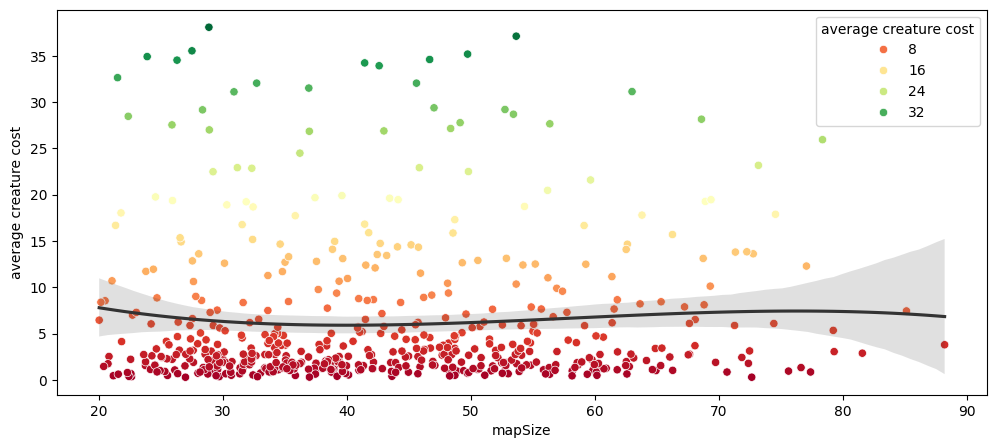

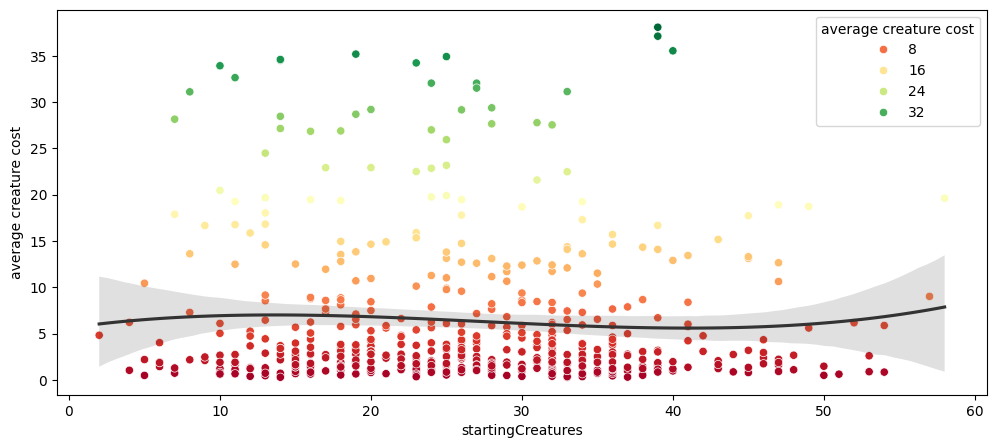

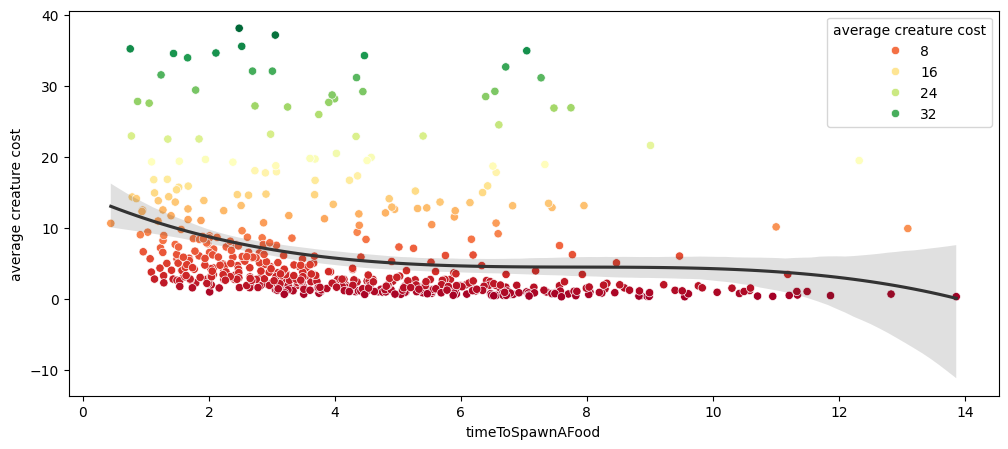

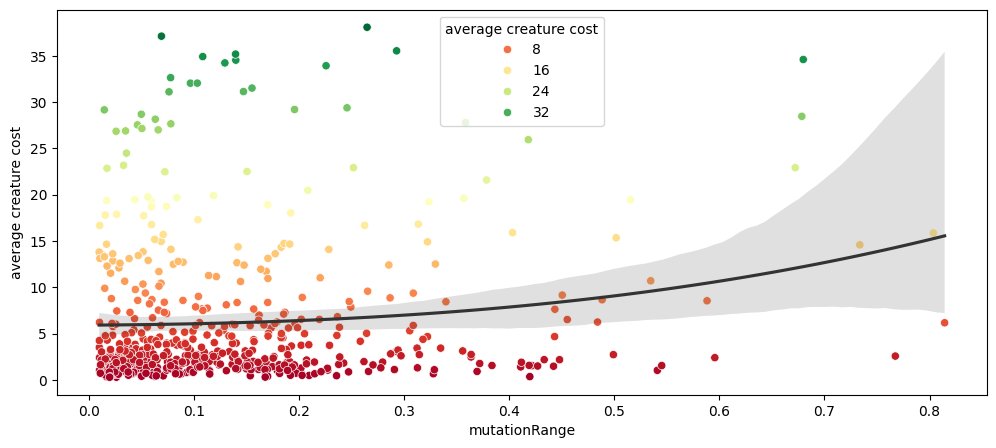

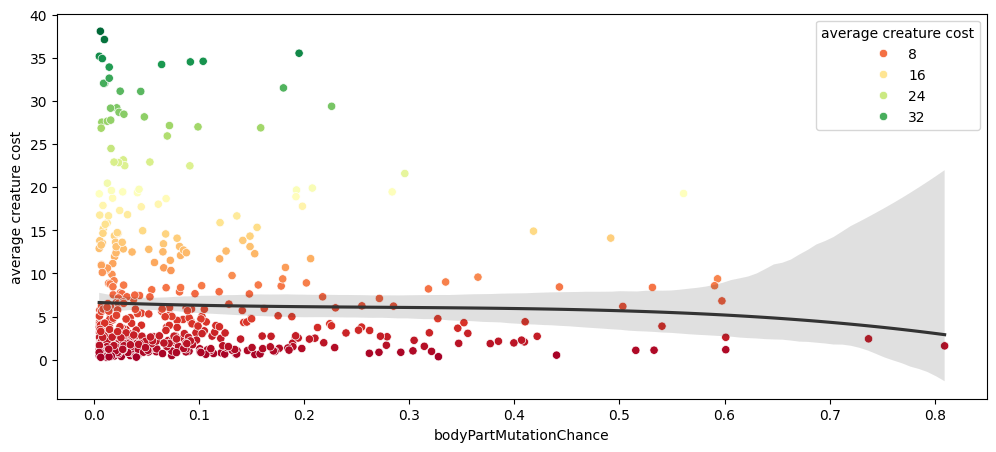

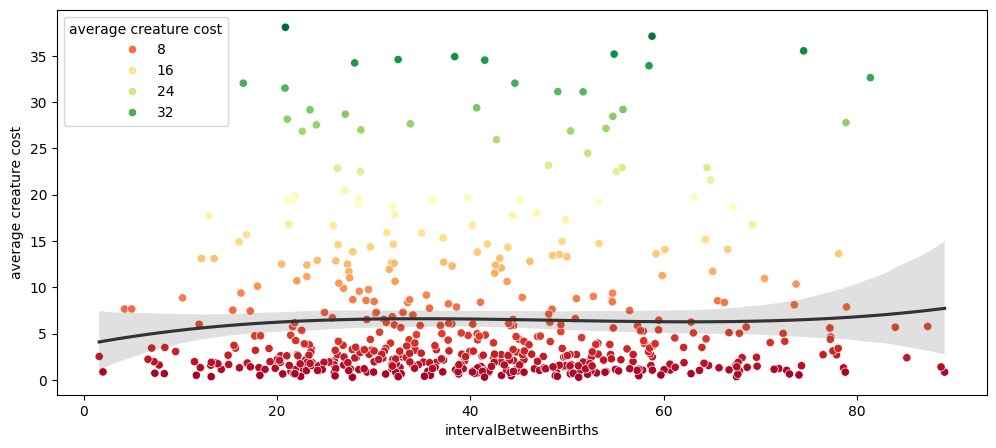

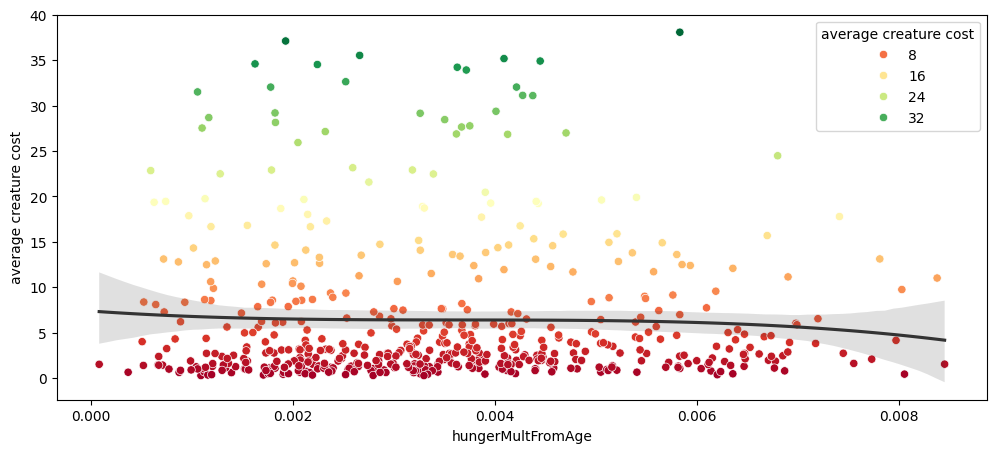

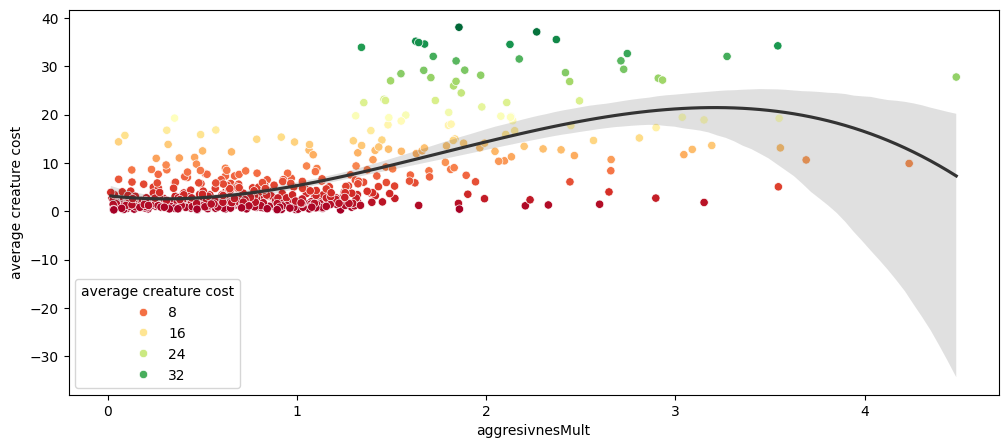

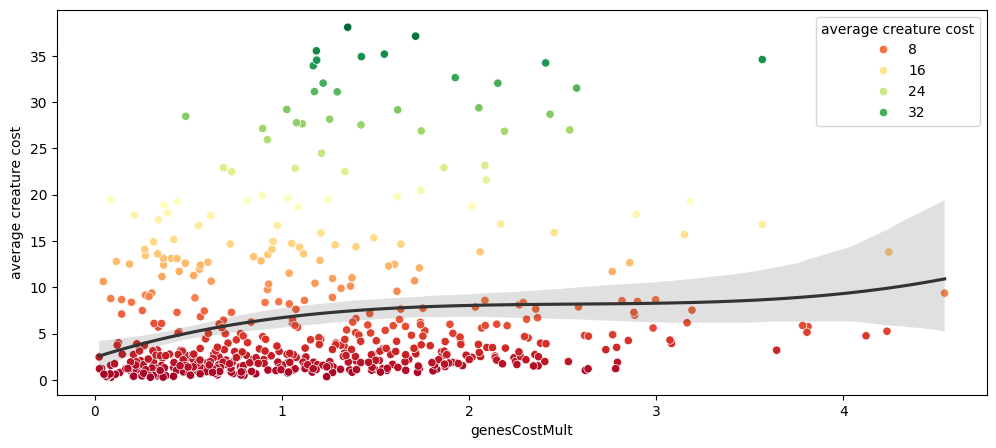

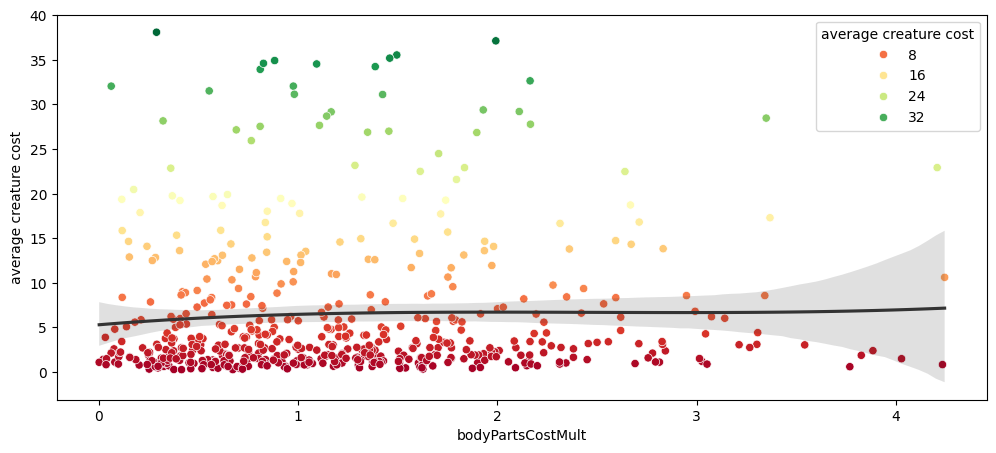

In [763]:
for i in df_1.columns[:-1]:
    visualise_scatter(
        x=i,
        y=ANALYZED,
        data=df_1,
        show_reg=True
        )

The results are underwhelming - the linear regression score is around 0.5. This means, that with this model, it is not possible to accurately estimate average creature cost from just the initial parameters.

# Estimating Average Creature Cost from Initial Parameters and Results

Perhaps regression based on the simulation result data and the simulation's initial parameters will be stronger.

In [764]:
df_2: DataFrame = initial_parameters.copy()

df_2 = df_2.reset_index(drop=True)
results: DataFrame = results.reset_index(drop=True)
df_2 = pd.concat([df_2, results], axis=1)
print(df_2.head())

    mapSize  startingCreatures  timeToSpawnAFood  mutationRange  \
0  23.76198               15.0          4.529128       0.383709   
1  24.69442               18.0          2.010151       0.286781   
2  44.97563               15.0          6.406969       0.767422   
3  38.97704               41.0          3.277926       0.022458   
4  25.28580               28.0          3.036764       0.092825   

   bodyPartMutationChance  intervalBetweenBirths  hungerMultFromAge  \
0                0.005873               64.64482           0.003437   
1                0.013992               10.22332           0.005131   
2                0.191583               41.19628           0.004297   
3                0.012400               68.63533           0.005164   
4                0.025843               38.36862           0.001853   

   aggresivnesMult  genesCostMult  bodyPartsCostMult  ...  \
0         1.202730       0.254597           0.791882  ...   
1         1.104876       0.536166           0.89

# Cleaning Data

In [765]:
#df_2 = df_2[df_2[ANALYZED] <= 50]
#print(df_2.head())

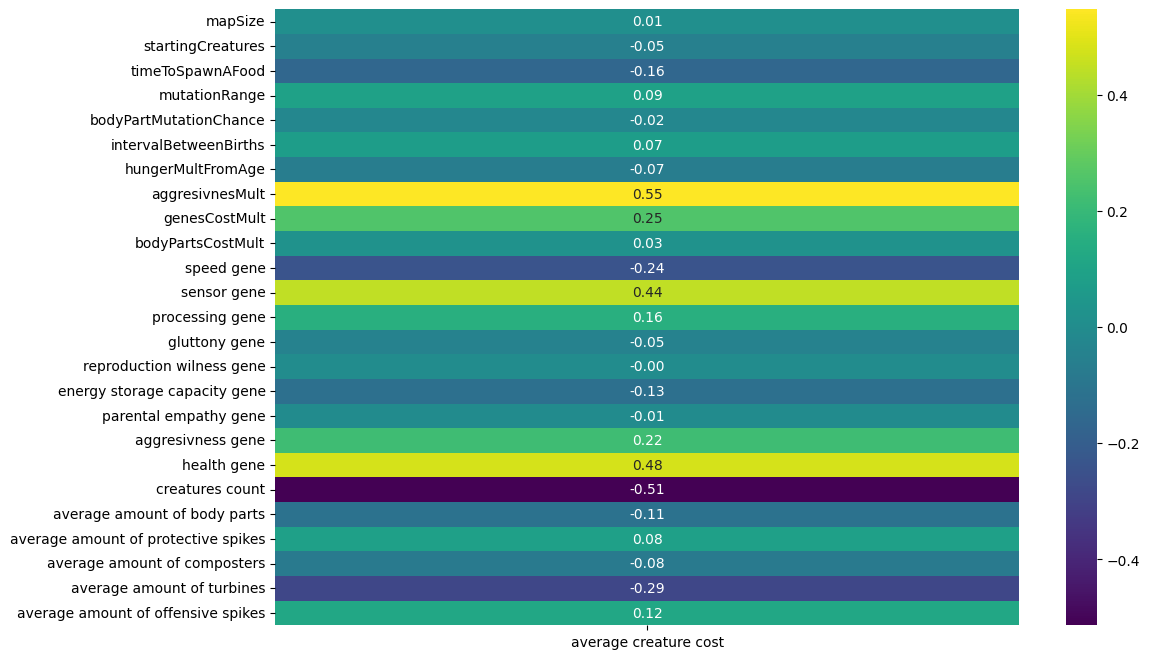

In [766]:
correlation_column(df_2, ANALYZED)

The correlations' strength seems to be more promising now. Let's keep the previously selected initial parameters (aggresivnesMult, timeToSpawnAFood and genesCostMult), but also add these parameters: speed gene, sensor gene, processing gene, aggresivness gene, health gene, creature count, average amount of turbines and average amount of offensive spikes.

In [767]:
#df_2 = df_2.loc[
#    :,
#    df_2.columns.intersection(
#        [
#            "aggresivnesMult",
#            "timeToSpawnAFood",
#            "genesCostMult",
#            "speed gene",
#            "sensor gene",
#            "processing gene",
#            "aggresivness gene",
#            "health gene",
#            "creatures count",
#            "average amount of turbines",
#            "average amount of offensive spikes",
#            "average creature cost"
#        ]
#    ),
#]

In [768]:
print(df_2.columns)

Index(['mapSize', 'startingCreatures', 'timeToSpawnAFood', 'mutationRange',
       'bodyPartMutationChance', 'intervalBetweenBirths', 'hungerMultFromAge',
       'aggresivnesMult', 'genesCostMult', 'bodyPartsCostMult', 'speed gene',
       'sensor gene', 'processing gene', 'gluttony gene',
       'reproduction wilness gene', 'energy storage capacity gene',
       'parental empathy gene', 'aggresivness gene', 'health gene',
       'creatures count', 'average creature cost',
       'average amount of body parts', 'average amount of protective spikes',
       'average amount of composters', 'average amount of turbines',
       'average amount of offensive spikes'],
      dtype='object')


In [769]:
df_2 = df_2[df_2["creatures count"] <= 100]

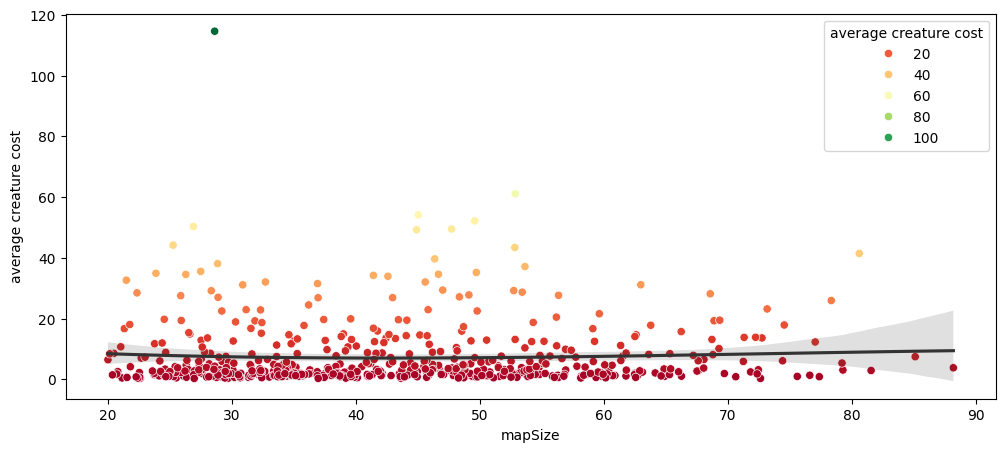

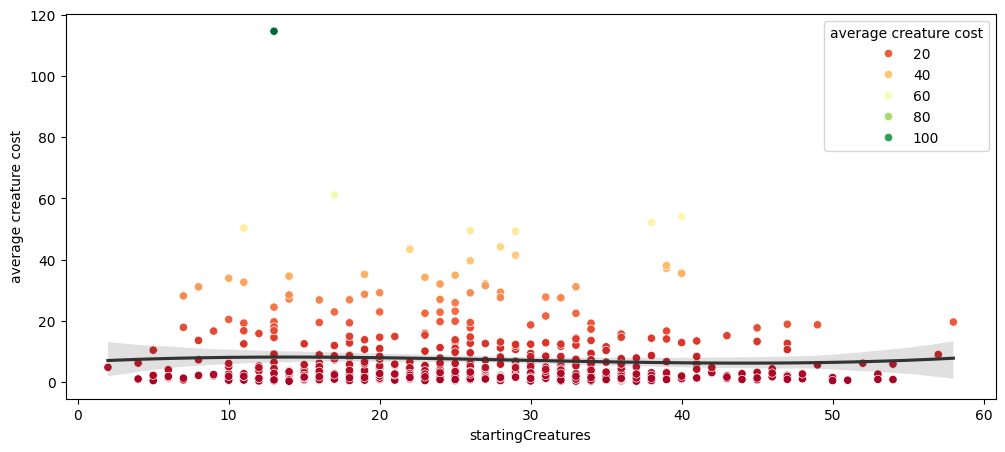

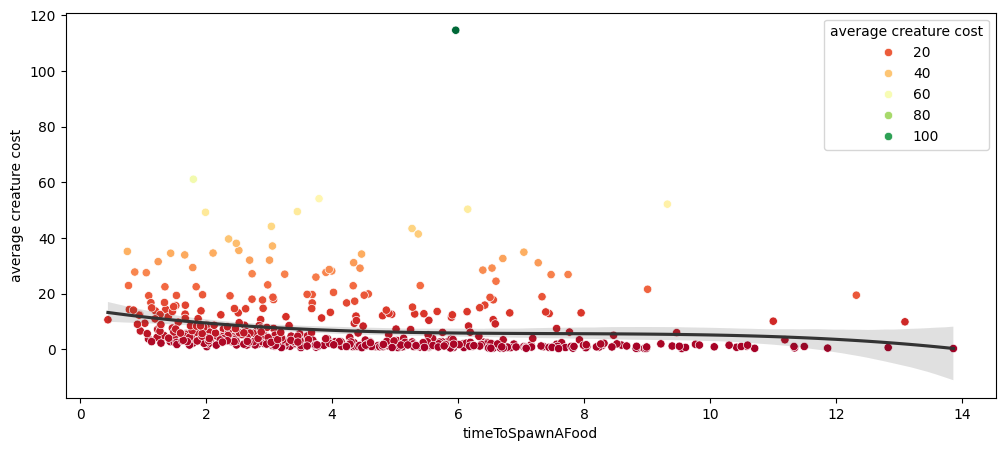

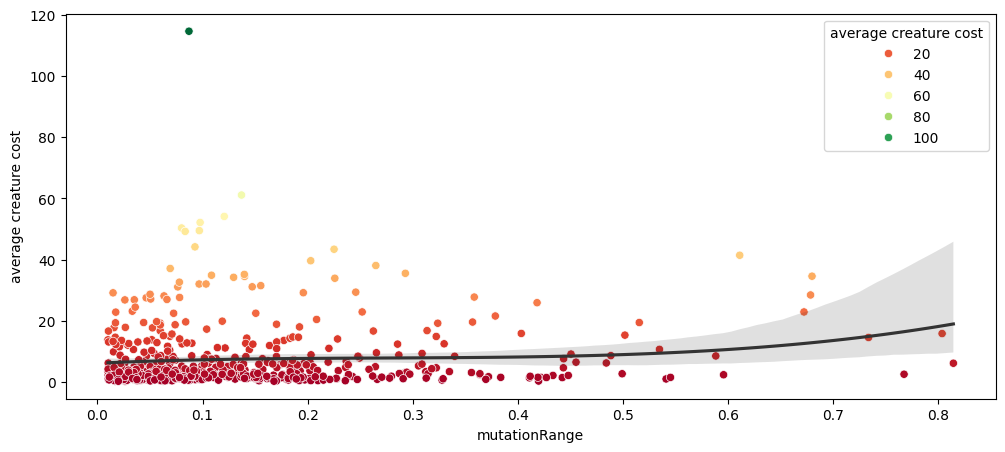

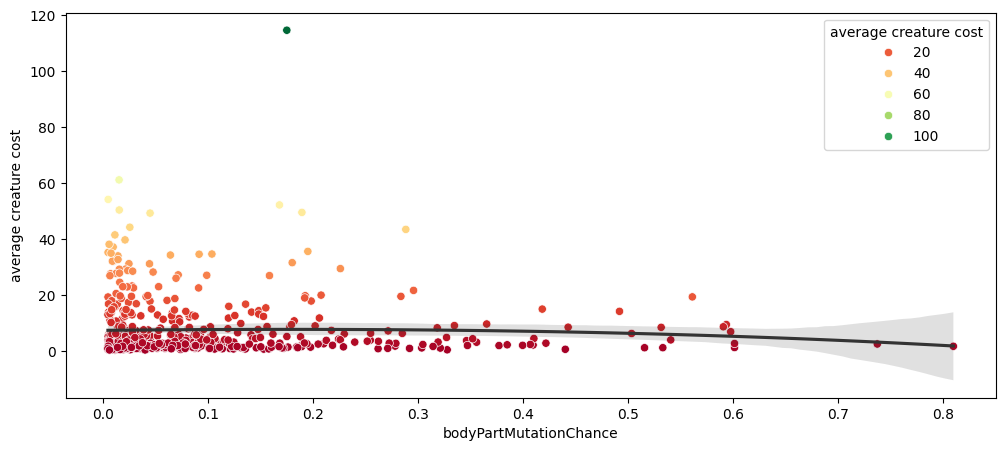

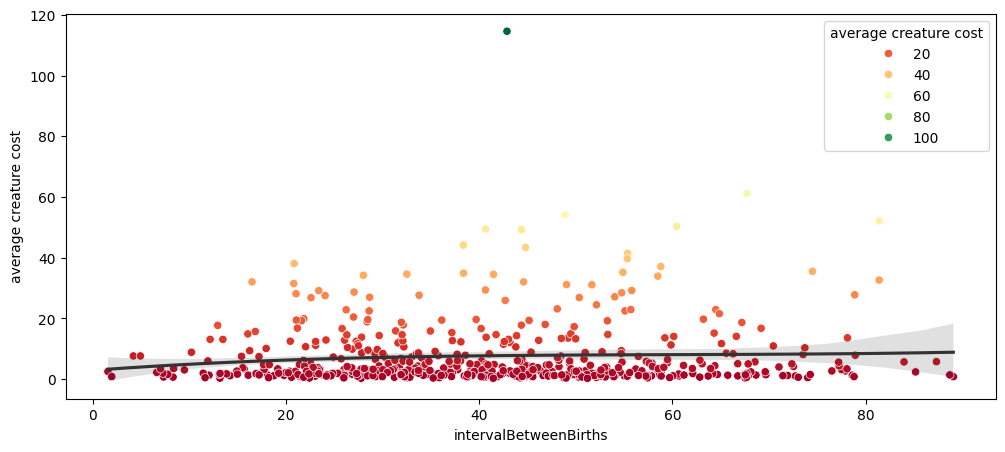

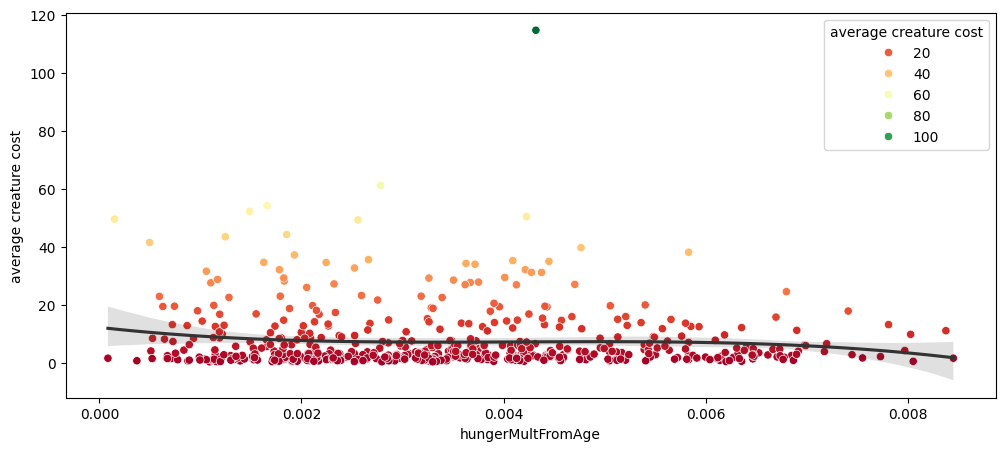

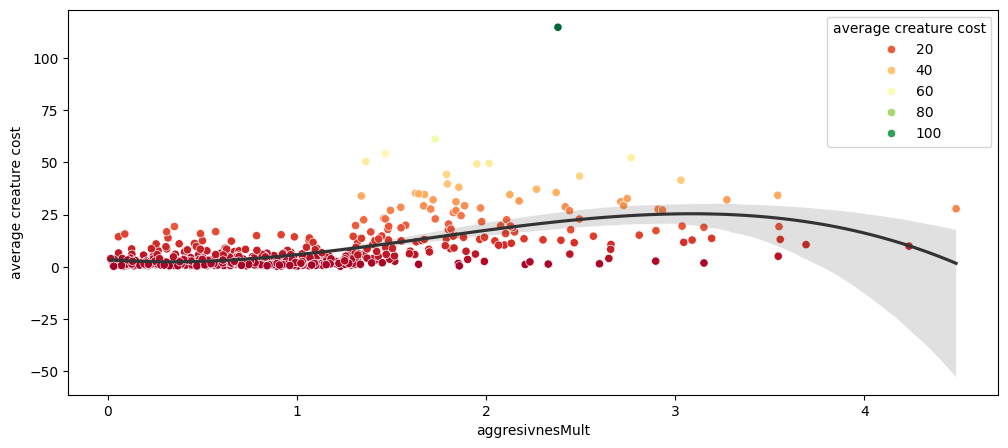

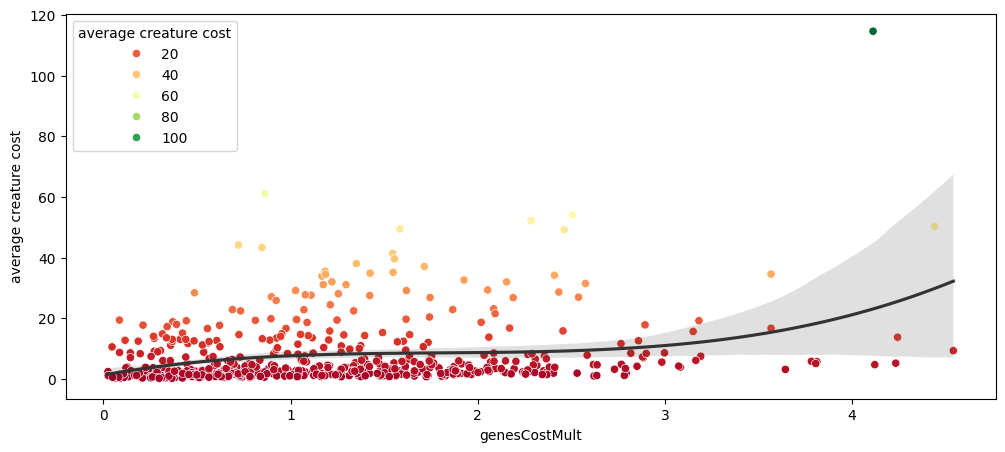

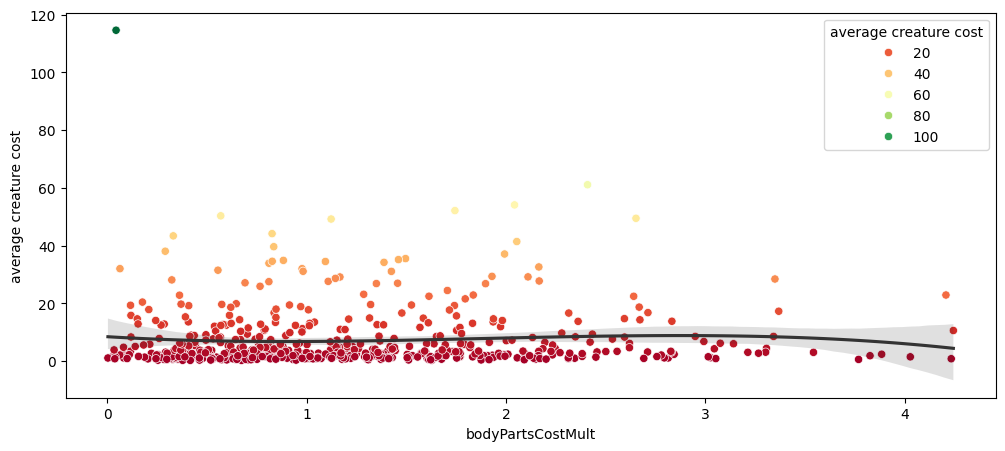

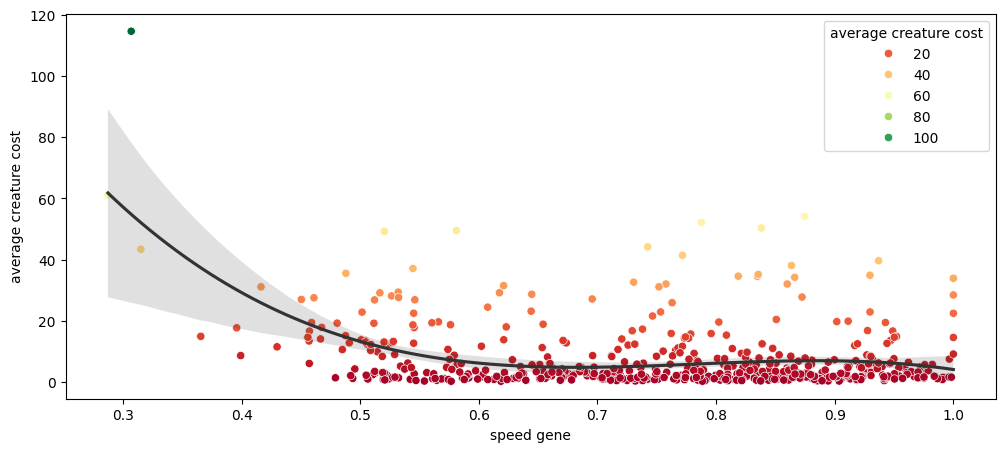

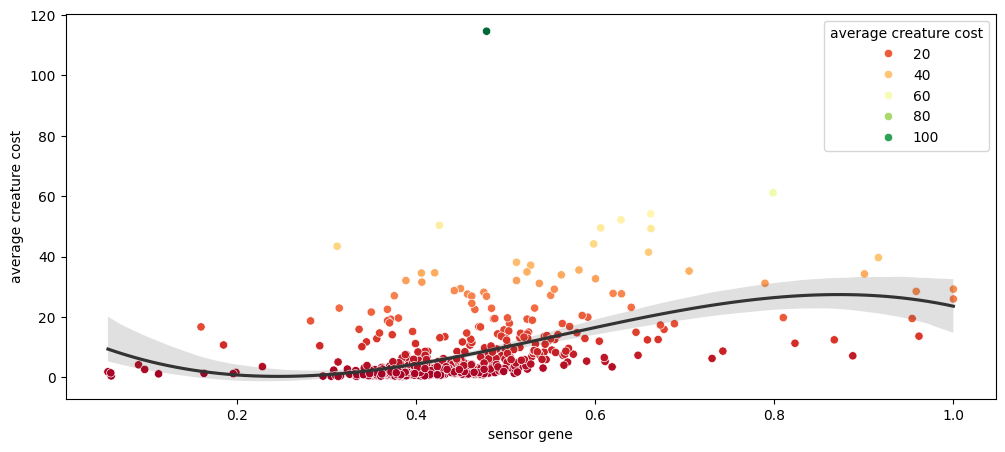

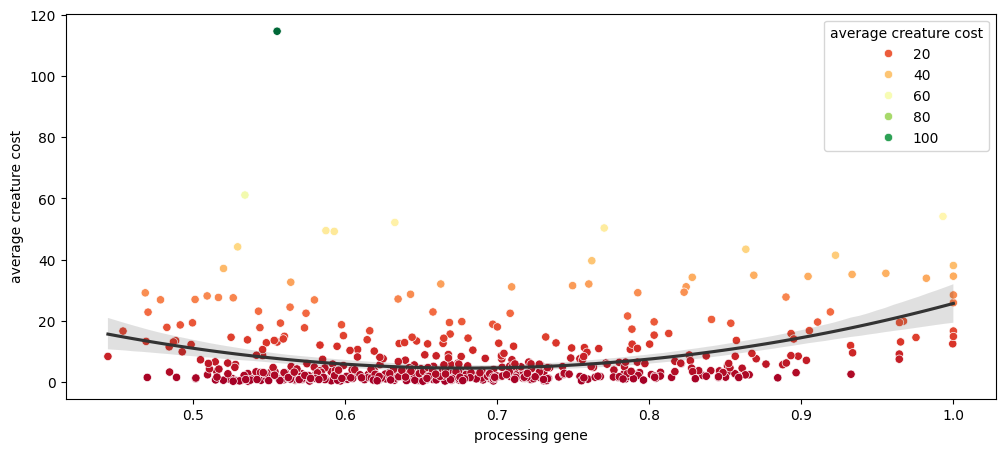

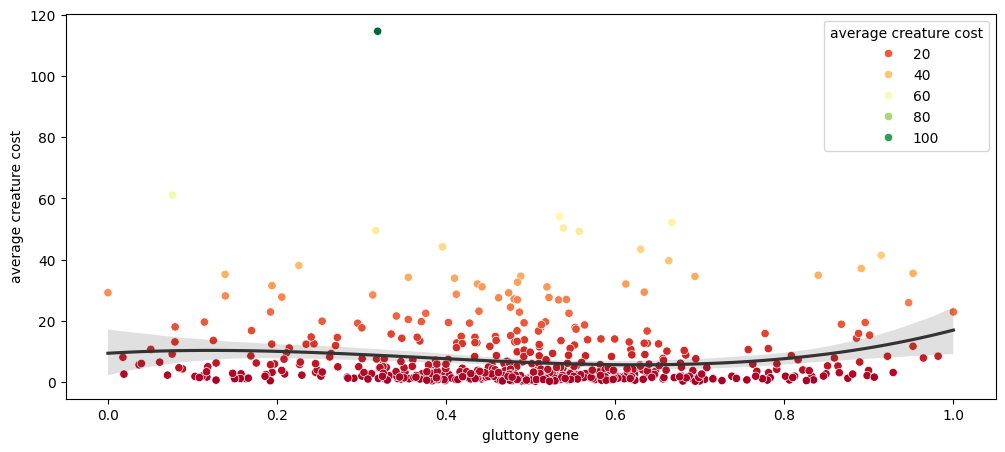

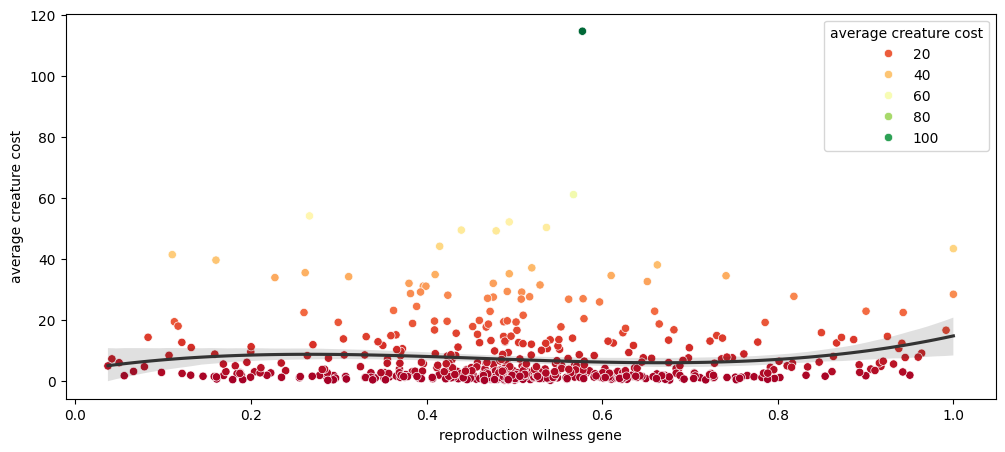

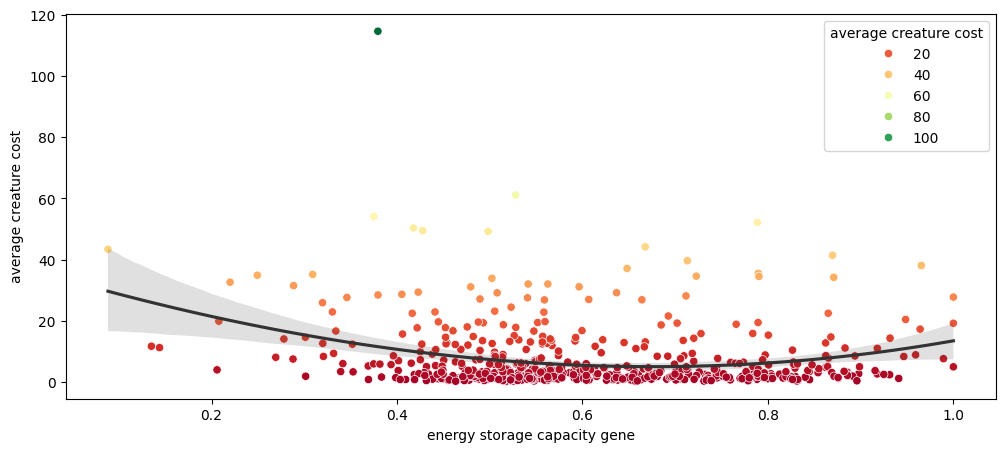

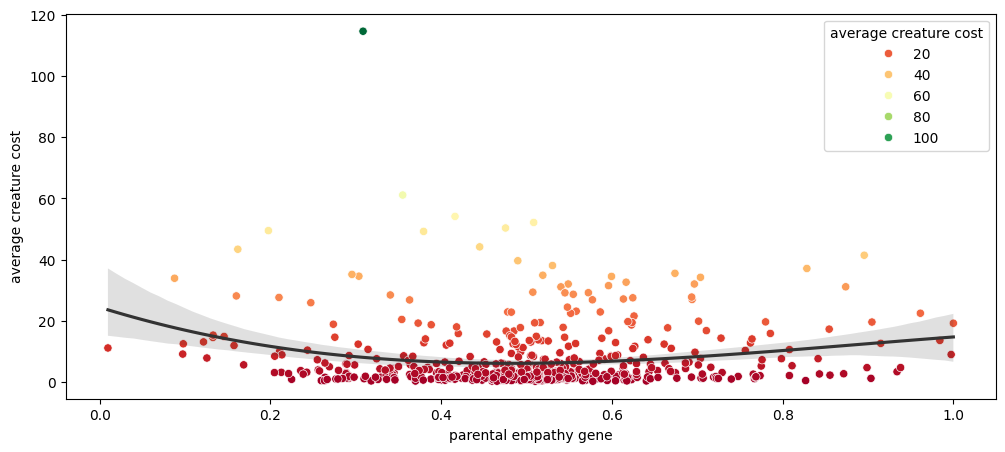

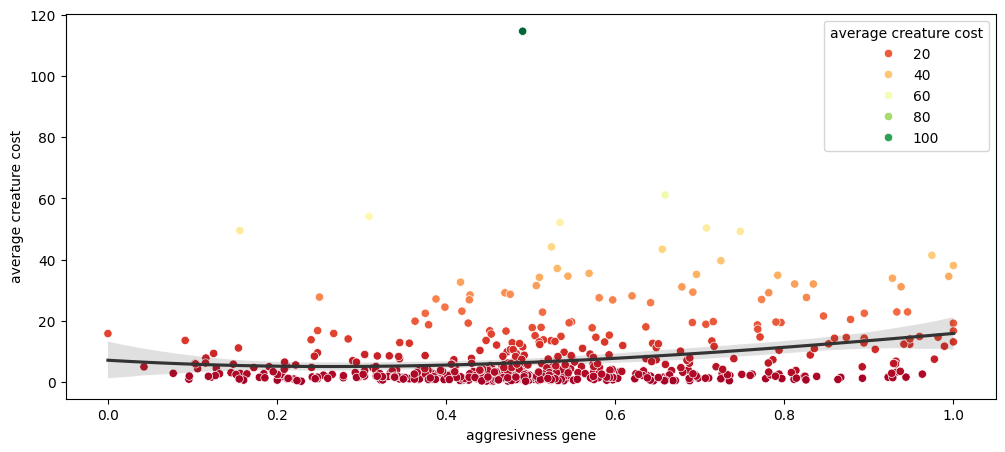

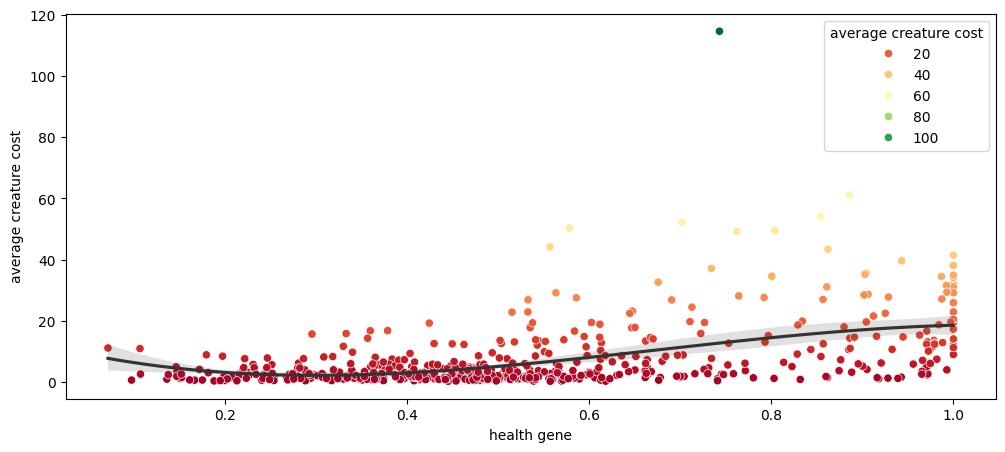

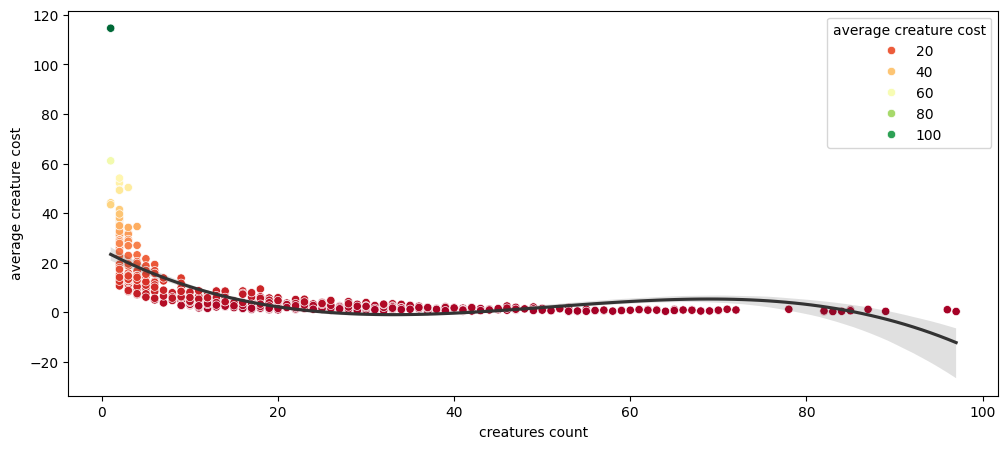

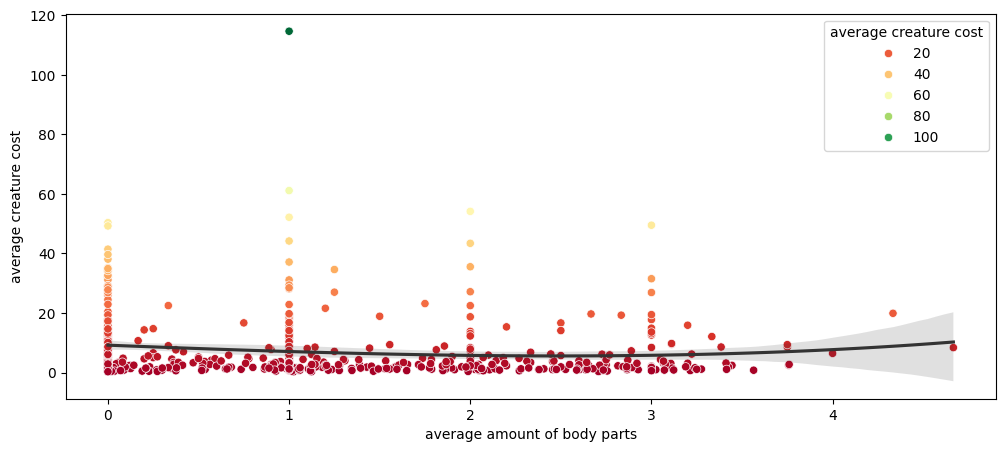

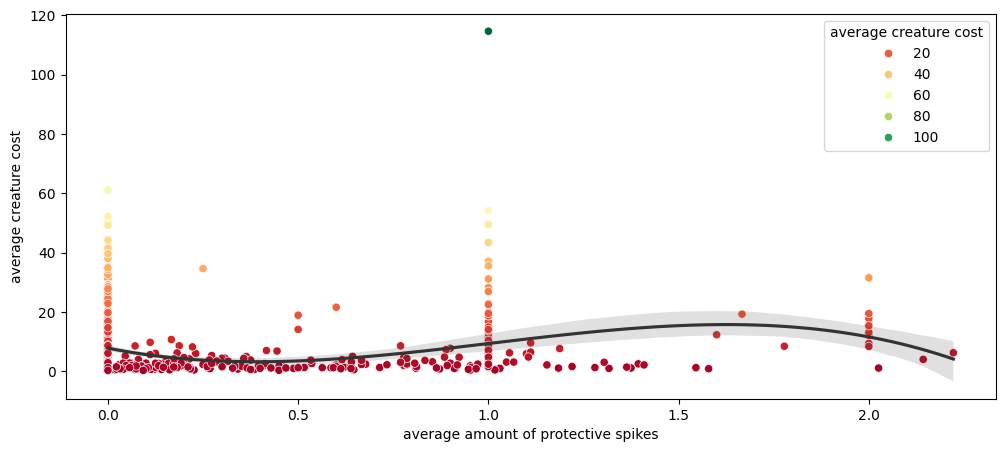

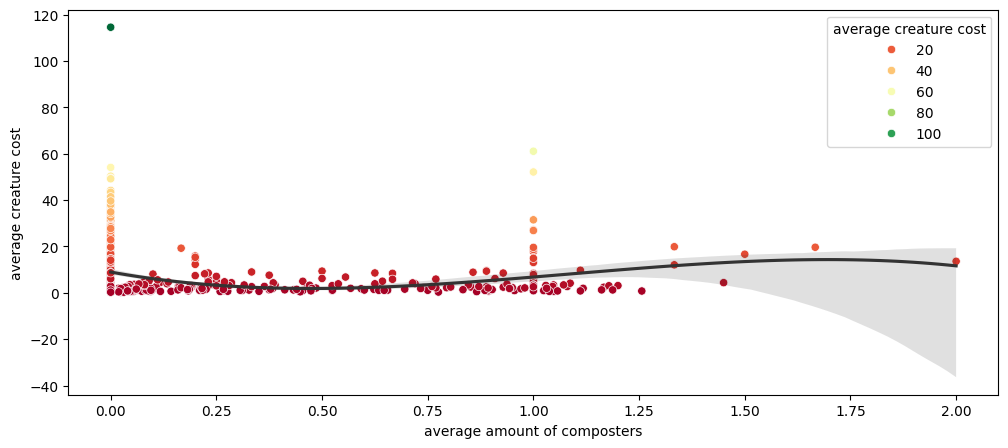

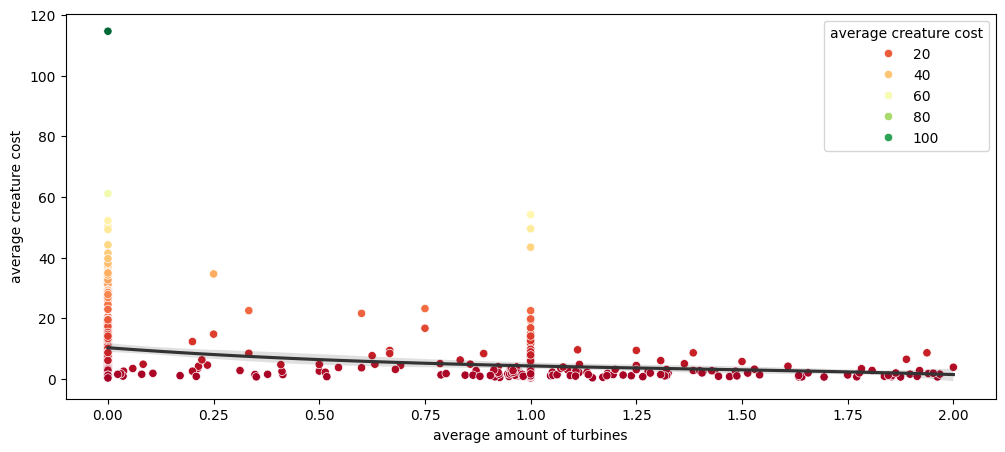

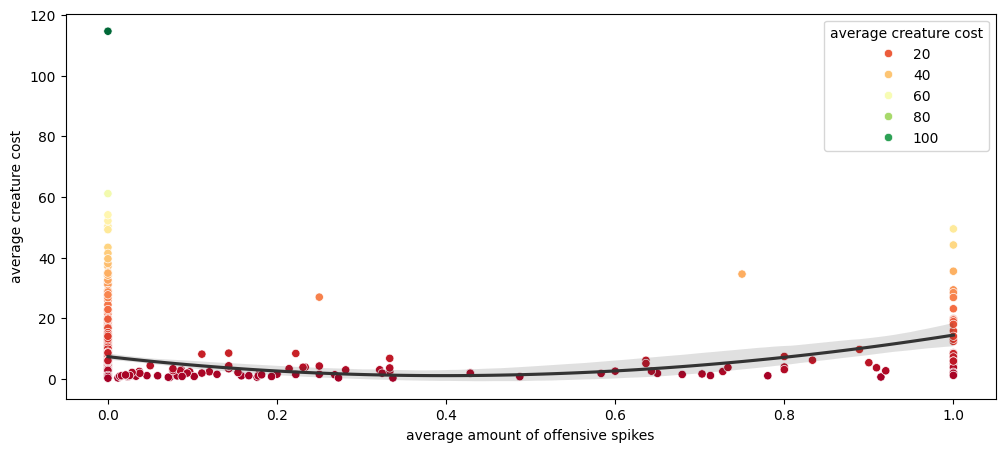

In [770]:
for i in df_2.drop(columns=[ANALYZED]).columns:
    visualise_scatter(
        x=i,
        y=ANALYZED,
        data=df_2,
        show_reg=True
        )

In [771]:
x = df_2.drop(columns=[ANALYZED])
y = df_2[ANALYZED]

scaler = StandardScaler()
x = scaler.fit_transform(x, y)

reg: LinearRegression = regress(x, y)

Regression coefficients: [-1.24290762e+00 -2.96209237e-01  6.76933652e-01  4.96050354e-02
 -4.48331307e-01  2.25817696e-01 -3.77441454e-01  2.99308859e+00
  3.22594665e+00  5.93067238e-01 -2.00606952e+00  2.99469541e+00
  7.26963950e-01 -2.76543955e-01 -1.55706557e-01 -2.98722624e-01
 -7.43154404e-01  1.03432581e+00  9.01601406e-01 -2.29051310e+00
  8.47332146e+05 -3.72341263e+05 -2.98898204e+05 -4.52447476e+05
 -2.19844282e+05]
Regression score on test data: 0.6564433012559722
Regression score on train data: 0.5704544728760708
Regression score on full data: 0.586690232215556


It is now clear that estimation with the result data yields better, but far from perfect regression score. Perhaps the LinearRegression model isn't the right tool for estimating this data?

# Comparing Different Models

In [772]:
X = df_1.drop(columns=[ANALYZED])
y = df_1[ANALYZED]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

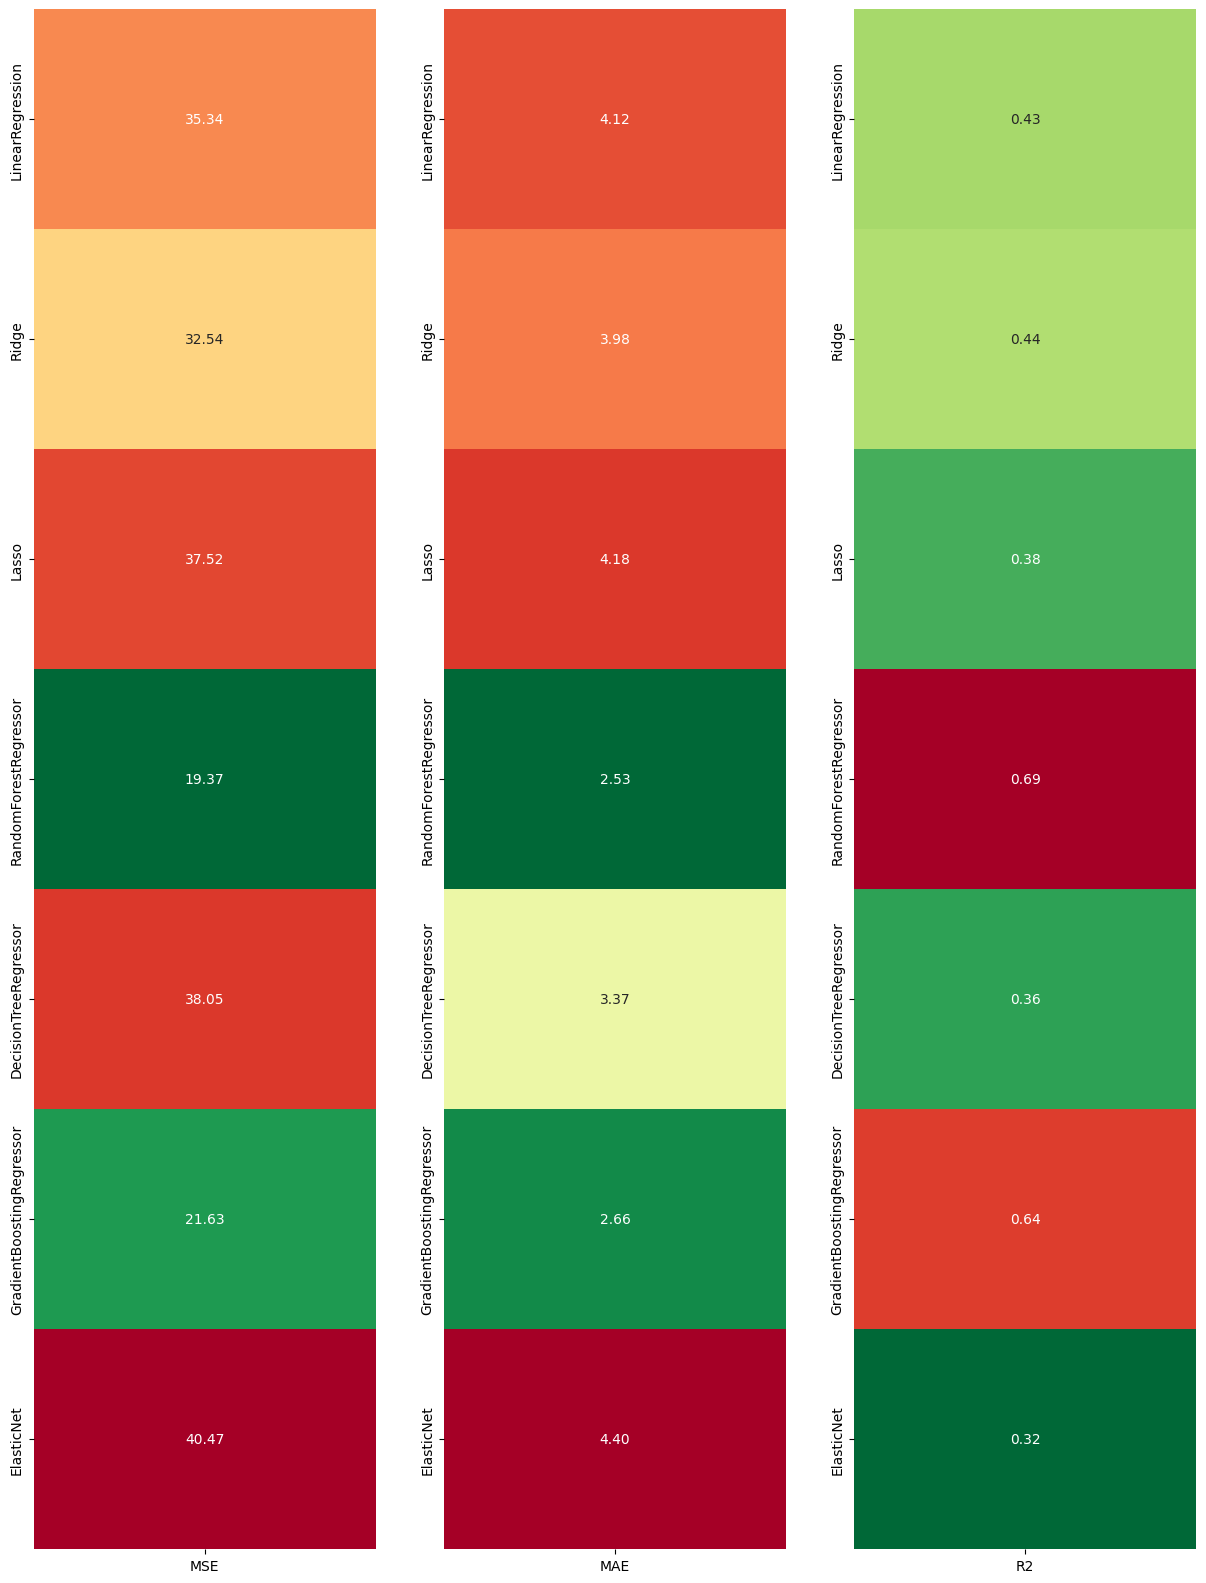

In [773]:
def test_models(x, y, models, repetitions=25) -> dict:
    """
    Test multiple models using cross-validation and return the average performance metrics.

    Parameters:
    x (array-like): The input features.
    y (array-like): The target variable.
    models (list): A list of machine learning models to test.
    repetitions (int, optional): The number of repetitions for cross-validation. Default is 25.

    Returns:
    dict: A dictionary containing the average performance metrics for each model.

    """
    results = {}
    for _ in range(repetitions):
        for model,name  in zip(models,[model.__class__.__name__ for model in models]):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            for metric, metricname in zip([mean_squared_error,mean_absolute_error,r2_score],['MSE','MAE','R2']):
                if name not in results:
                    results[name] = {}
                if metricname not in results[name]:
                    results[name][metricname] = []
                results[name][metricname].append(metric(y_test,y_pred))
                
    for key in results:
        for metric in results[key]:
            results[key][metric] = np.mean(results[key][metric])
    return results

results = test_models(X,y,[LinearRegression(),Ridge(),Lasso(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),ElasticNet()],repetitions=25)
results_df = pd.DataFrame(results).T
fig, ax= plt.subplots(ncols=3,figsize=(15,20))
sns.heatmap(results_df[['MSE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[0],cbar=False)
sns.heatmap(results_df[['MAE']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[1],cbar=False)
sns.heatmap(results_df[['R2']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[2],cbar=False)

Three models will be compared: LinearRegression, RandomForestRegressor and GradientBoostingRegressor.

In [774]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [775]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name) -> dict[str, float]:
    mse: float = mean_squared_error(y_true, y_pred)
    mae: float = mean_absolute_error(y_true, y_pred)
    r2: float  = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}")
    
    return {"mse": mse, "mae": mae, "r2": r2}

lr_scores: dict[str, float] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_scores: dict[str, float] = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
gbr_scores: dict[str, float] = evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")

scores = pd.DataFrame([lr_scores, rf_scores, gbr_scores], index=["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"])

Linear Regression - MSE: 43.727076993569746, MAE: 4.67060626822107, R2: 0.45057548289573834
Random Forest Regressor - MSE: 19.58749922532484, MAE: 2.650609925252336, R2: 0.7538858519004877
Gradient Boosting Regressor - MSE: 21.732985185837787, MAE: 2.890286958813695, R2: 0.7269281252730677


<Axes: >

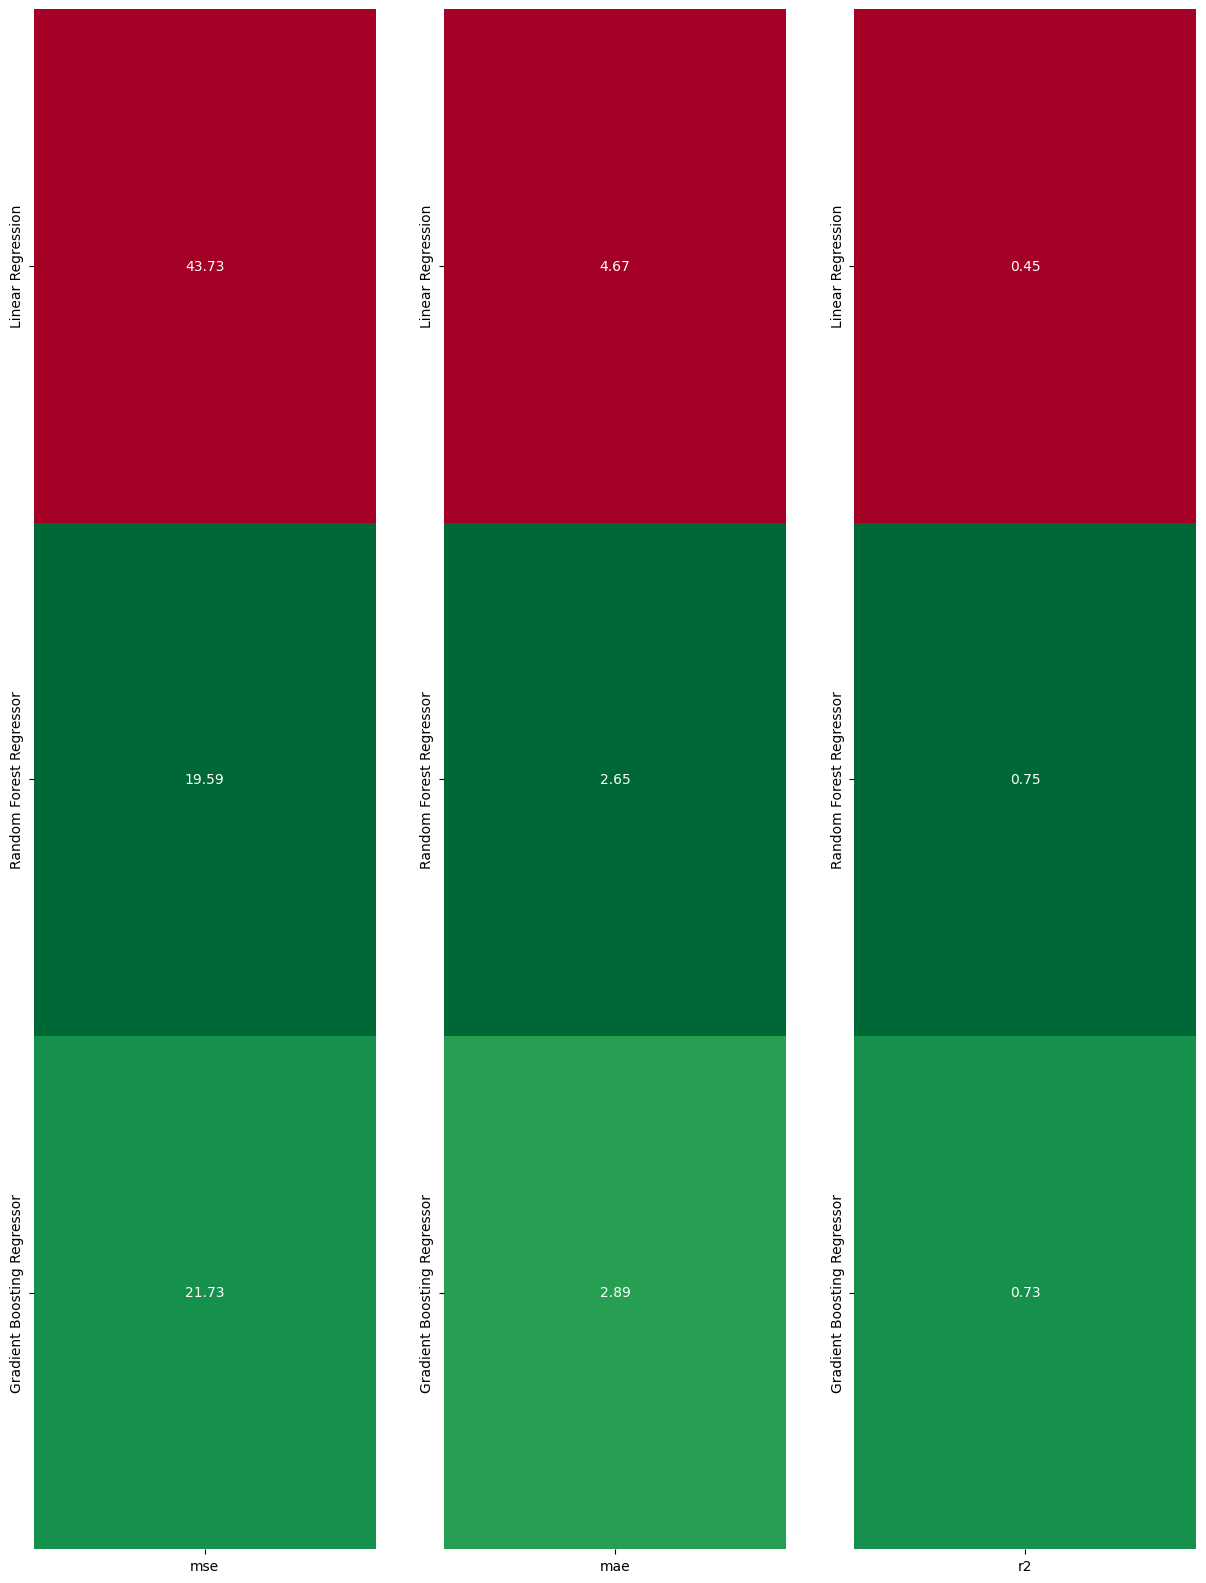

In [776]:
fig, ax= plt.subplots(ncols=3,figsize=(15,20))

sns.heatmap(scores[['mse']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[0],cbar=False)
sns.heatmap(scores[['mae']],annot=True,fmt='.2f',cmap='RdYlGn_r',ax=ax[1],cbar=False)
sns.heatmap(scores[['r2']],annot=True,fmt='.2f',cmap='RdYlGn',ax=ax[2],cbar=False)

In [777]:
for i in range(10):
    print(f"LR: {y_pred_lr[i]}, RF: {y_pred_rf[i]}, GBR: {y_pred_gbr[i]}, Real: {y_test.iloc[i]}")

LR: 9.868851016977063, RF: 11.610016697999995, GBR: 11.901027215071393, Real: 11.94458
LR: 12.791597136427558, RF: 13.803372162999995, GBR: 11.867379845892895, Real: 1.298245
LR: 3.9328480986749508, RF: 3.563933910000001, GBR: 4.205497250221502, Real: 2.217773
LR: 6.855553708840795, RF: 2.045871169000001, GBR: 1.5609856458009543, Real: 1.402737
LR: 0.3605456730717149, RF: 1.7407785759999987, GBR: 1.432080192456028, Real: 1.022318
LR: 10.406464209500742, RF: 19.223001600000014, GBR: 21.530534295263628, Real: 29.1599
LR: 1.0149845430425382, RF: 3.0140042360000017, GBR: 3.5132374081477584, Real: 2.72594
LR: 3.33681976340137, RF: 1.697451205000001, GBR: 1.764285203204523, Real: 1.770303
LR: 2.2787893769450367, RF: 2.8247905520000005, GBR: 4.232280923067892, Real: 2.085552
LR: 6.995277559991164, RF: 3.2416670200000004, GBR: 2.7395582279372293, Real: 4.392463


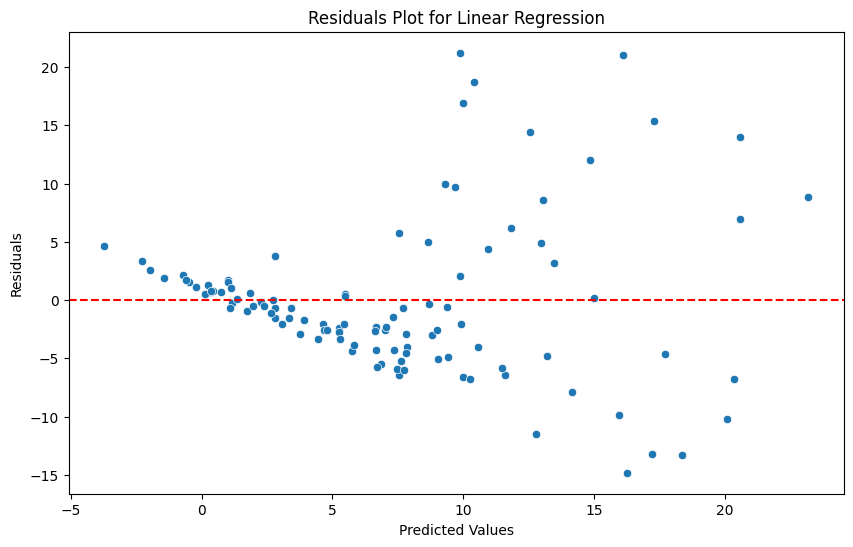

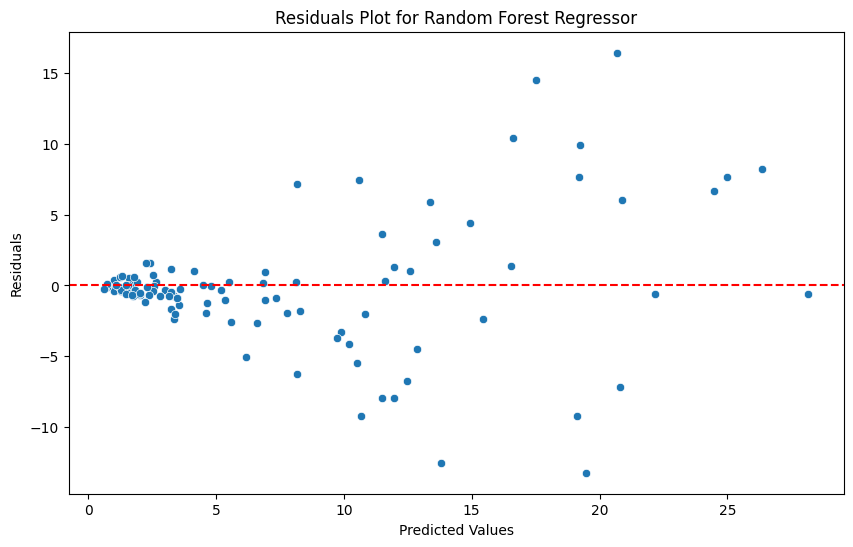

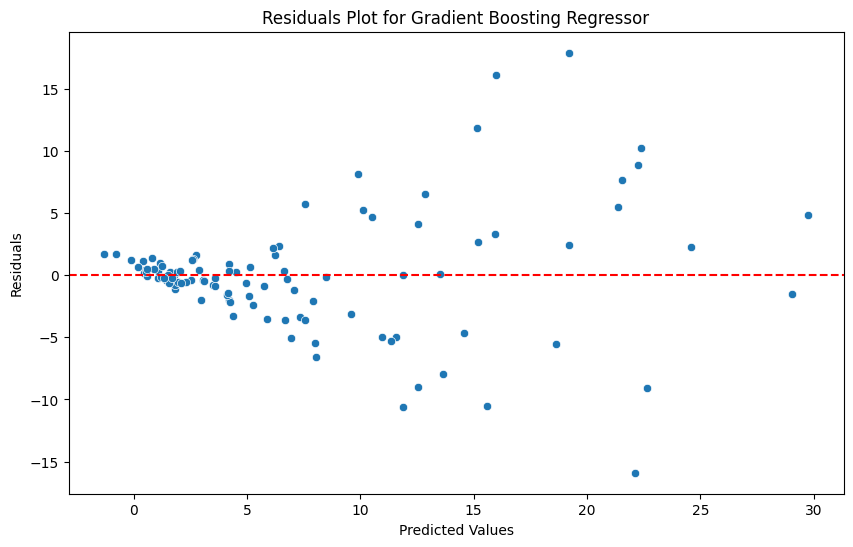

In [778]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest Regressor")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting Regressor")

# Optimizing Models

In [779]:
def best_linear_fit(x_train, y_train, x_test, y_test) -> tuple[object, dict]:
    '''Tests different parameters for LinearRegression, Ridge and Lasso and returns the best model, its parameters and the score on the training set'''
    best_params = {}
    best_score = 0
    best_model = None
    
    # Define the hyperparameter grid
    degrees = [1, 2, 3]  # Degree of polynomial features
    alphas = [0.1, 1, 10]  # Regularization strengths for Ridge and Lasso
    models = ['linear']
    
    for degree, alpha, model_type in product(degrees, alphas, models):
        if model_type == 'linear':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('linear', LinearRegression())
            ])
            model_name = 'Linear Regression'
        elif model_type == 'ridge':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('ridge', Ridge(alpha=alpha))
            ])
            model_name = 'Ridge Regression'
        elif model_type == 'lasso':
            model = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('lasso', Lasso(alpha=alpha))
            ])
            model_name = 'Lasso Regression'
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {
                'model': model_name,
                'degree': degree,
                'alpha': alpha if model_type in ['ridge', 'lasso'] else None
            }
    
    return best_model, best_params

# Find the best Linear Regression model
best_model, best_params = best_linear_fit(X_train_scaled, y_train, X_test_scaled, y_test)
print(best_params)

{'model': 'Linear Regression', 'degree': 1, 'alpha': None}


In [780]:
def best_forest_fit(x_train, y_train, x_test,y_test) -> tuple[RandomForestRegressor,dict]:
    '''Tests different parameters for RandomForestRegressor and returns the best model, its parameters and the score on the training set'''
    best_params = {}
    best_score = 0
    best_model = None
    for n_estimators, min_samples_split, min_samples_leaf,max_features in product([5,10,25,50],[5,10,15],[1,3,5],[0.2,'sqrt','log2',1]):
        model = RandomForestRegressor(n_jobs=1,n_estimators=n_estimators,max_depth=None,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,random_state=42)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features}
    return best_model, best_params

rf, forest_params = best_forest_fit(X_train, y_train, X_test, y_test)
print(forest_params)

{'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [781]:
def best_gradient_boosting_fit(x_train, y_train, x_test, y_test) -> tuple[GradientBoostingRegressor, dict]:
    '''Tests different parameters for Gradient Boosting Regressor and returns the best model, its parameters'''
    best_params = {}
    best_score = 0
    best_model = None
    for n_estimators, min_samples_split, min_samples_leaf, max_features, learning_rate in product([125,150,200,300],[2,5,10],[1,3,5],[0.2,'sqrt','log2',1],[0.05,0.075,0.1,0.15]):
        model = GradientBoostingRegressor(n_estimators=n_estimators,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,learning_rate=learning_rate,random_state=42)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test,y_pred)
        if score > best_score:
            best_model = model
            best_score = score
            best_params = {'n_estimators':n_estimators,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'max_features':max_features,'learning_rate':learning_rate}
    return best_model, best_params

gbr, gradient_params = best_gradient_boosting_fit(X_train, y_train, X_test, y_test)
print(gradient_params)

{'n_estimators': 125, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'learning_rate': 0.15}


In [782]:
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, max_features='sqrt',
                          min_samples_leaf=5, n_estimators=125,
                          random_state=42)

In [783]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

def evaluate_model(y_true, y_pred, model_name) -> dict[str, float]:
    mse: float = mean_squared_error(y_true, y_pred)
    mae: float = mean_absolute_error(y_true, y_pred)
    r2: float  = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R2: {r2}")
    
    return {"mse": mse, "mae": mae, "r2": r2}

lr_scores: dict[str, float] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
rf_scores: dict[str, float] = evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
gbr_scores: dict[str, float] = evaluate_model(y_test, y_pred_gbr, "Gradient Boosting Regressor")

scores = pd.DataFrame([lr_scores, rf_scores, gbr_scores], index=["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"])

Linear Regression - MSE: 43.727076993569746, MAE: 4.67060626822107, R2: 0.45057548289573834
Random Forest Regressor - MSE: 23.67579172336153, MAE: 3.214281285835394, R2: 0.7025170368332219
Gradient Boosting Regressor - MSE: 21.017189587192576, MAE: 3.0191734630409264, R2: 0.7359219953913205


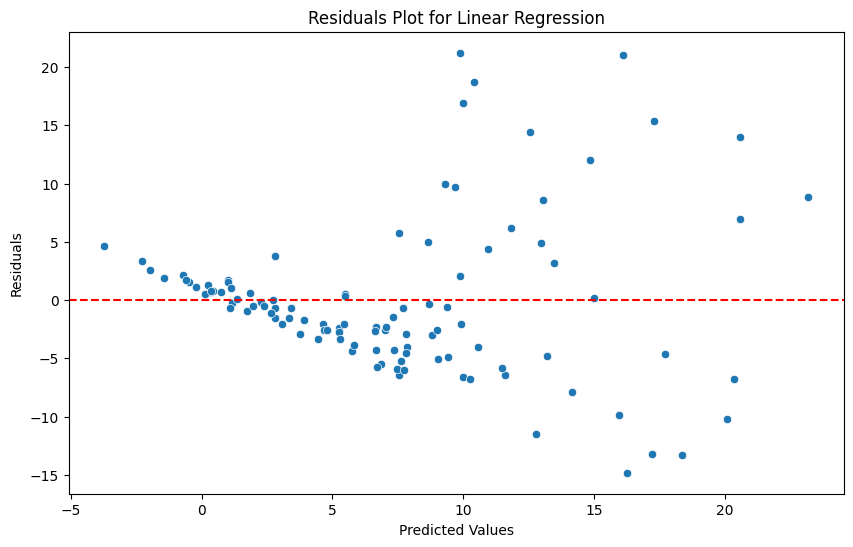

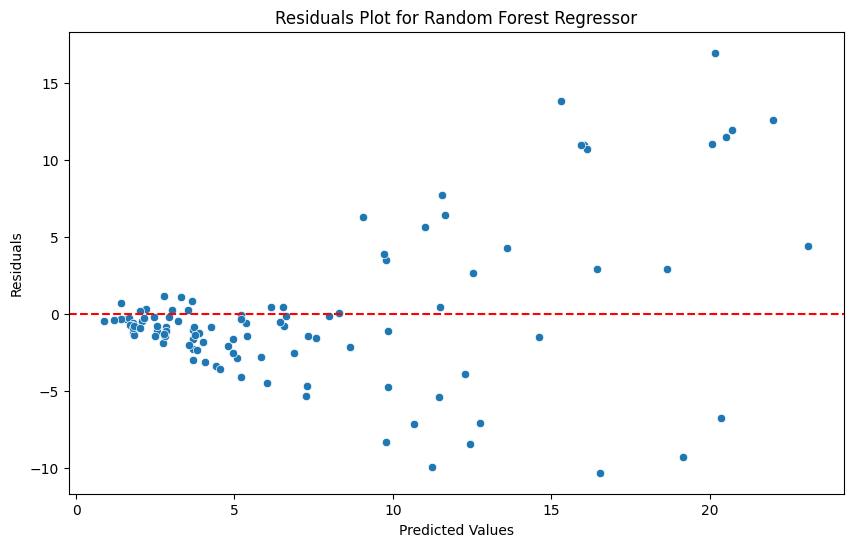

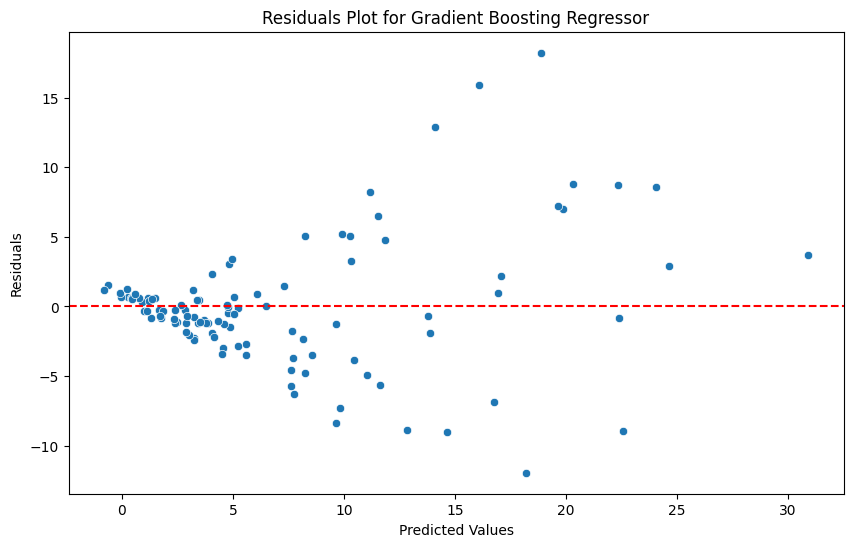

In [784]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals Plot for {model_name}')
    plt.show()

plot_residuals(y_test, y_pred_lr, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest Regressor")
plot_residuals(y_test, y_pred_gbr, "Gradient Boosting Regressor")

It is clear, that the models' accuracy decreases, when the predicted values are higher. This suggests heteroscedasticity, and can be improved with transforming data.

# Lowering heteroscedasticity

Transformed Random Forest Regressor - MSE: 37.91196558215248, MAE: 3.4671367730640563, R2: 0.5236415325563468


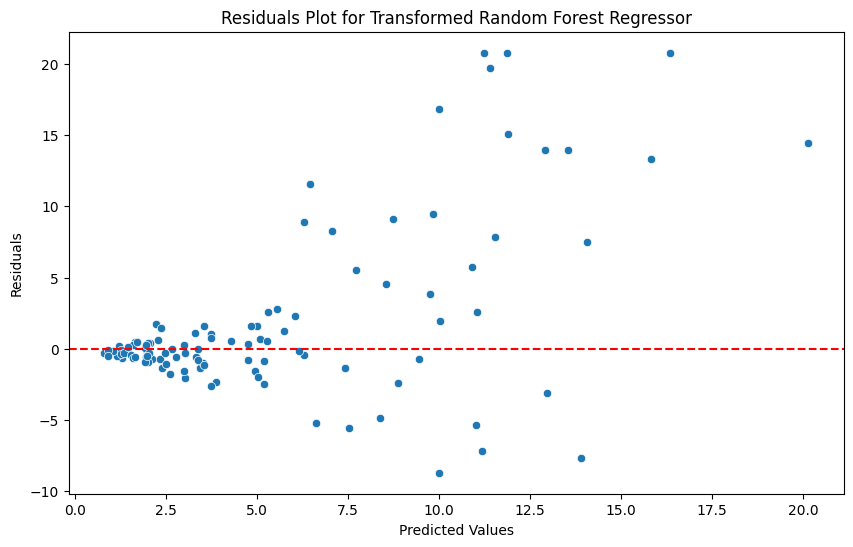

Transformed Gradient Boosting Regressor - MSE: 30.59132942972015, MAE: 3.0035101216780458, R2: 0.6156242869384337


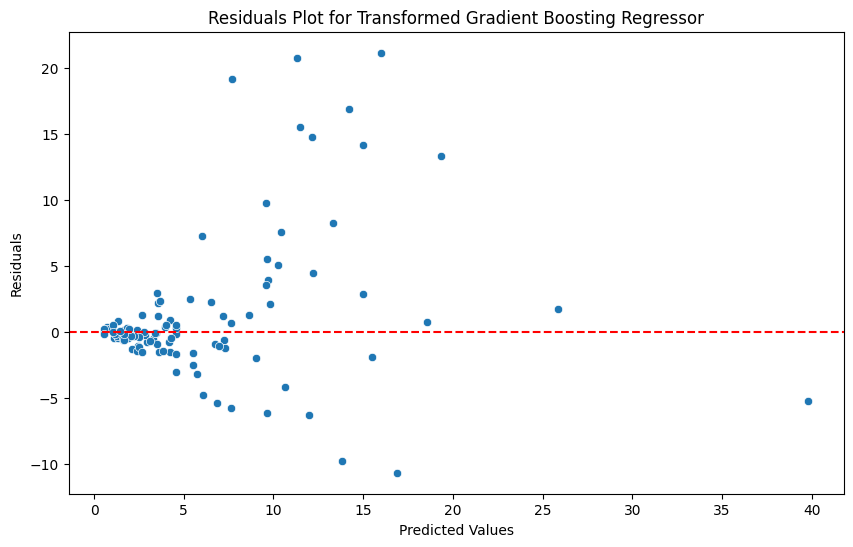

In [785]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

gbr.fit(X_train, y_train_log)
y_pred_log_gbr = gbr.predict(X_test)
y_pred_gbr = np.expm1(y_pred_log_gbr)

rf.fit(X_train, y_train_log)
y_pred_log_rf = rf.predict(X_test)
y_pred_rf = np.expm1(y_pred_log_rf)

evaluate_model(y_test, y_pred_rf, "Transformed Random Forest Regressor")
plot_residuals(y_test, y_pred_rf, "Transformed Random Forest Regressor")

evaluate_model(y_test, y_pred_gbr, "Transformed Gradient Boosting Regressor")
plot_residuals(y_test, y_pred_gbr, "Transformed Gradient Boosting Regressor")

Applying a logarithmic transformation to data slightly improved the MSE and MAE values for Gradient Boosting Regressor. R2 score slightly dropped